In [1]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [2]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [3]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/asn7yfxccx9hqi4afrnw685xw6c6382z-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [7]:
my_gset_lib <- 
    "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/gset/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"

In [8]:
.libPaths(new = my_gset_lib, 
          include.site = FALSE)

In [9]:
.libPaths()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/gset/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [10]:
library(magrittr)

In [11]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built under R 4.4.1 but the current version is
4.4.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [12]:
list.files(here::here('r_objects'))

[1] "GBonilla_seurat.RDS"              "GBonilla_seurat_w_Regulons.RDS"  
[3] "pyscenic_regulon_list_object.RDS"

In [13]:
GBonilla_seurat <-  
    readRDS(here::here('r_objects', 'GBonilla_seurat_w_Regulons.RDS'))

In [ ]:
# The following script will be used with MAST package for DE calculation.

# DE-centered analysis:

# Step 1: Identify Differentially Expressed Genes (DEGs)
# We need to compare D2 and D14 endothelial cells to control (sham) endothelial cells.

# Subset Endothelial Cells

# library(Seurat)
# # Extract endothelial cells
# endo_cells <- subset(seurat_obj, idents = "Endothelial")  # Adjust based on annotation
# Find DEGs (e.g., D2 vs. Sham)


# endo_cells$group <- factor(endo_cells$group, levels = c("Sham", "D2", "D14"))
# deg_d2 <- FindMarkers(endo_cells, ident.1 = "D2", ident.2 = "Sham", test.use = "DESeq2")
# deg_d14 <- FindMarkers(endo_cells, ident.1 = "D14", ident.2 = "Sham", test.use = "DESeq2")
# Filter significant genes (adjusted p-value < 0.05 & log2FC threshold)


# deg_d2_sig <- deg_d2 %>% dplyr::filter(p_val_adj < 0.05 & abs(log2FC) > 0.25)
# deg_d14_sig <- deg_d14 %>% dplyr::filter(p_val_adj < 0.05 & abs(log2FC) > 0.25)
# Step 2: Identify Gene Sets (Modules) Characterizing D2 and D14 Endothelial Cells
# You can use clustering methods such as WGCNA, k-means, or functional enrichment analysis.

# Functional Enrichment Analysis (GO/KEGG)

# library(clusterProfiler)
# # Convert gene symbols
# gene_list_d2 <- deg_d2_sig$gene
# gene_list_d14 <- deg_d14_sig$gene

# # Enrichment analysis
# go_d2 <- enrichGO(gene_list_d2, OrgDb = org.Mm.eg.db, keyType = "SYMBOL", ont = "BP")
# go_d14 <- enrichGO(gene_list_d14, OrgDb = org.Mm.eg.db, keyType = "SYMBOL", ont = "BP")

# # Visualize
# dotplot(go_d2) + ggtitle("GO Enrichment - D2 Endothelial")
# dotplot(go_d14) + ggtitle("GO Enrichment - D14 Endothelial")
# Gene Set Clustering

# library(GSEABase)
# library(GSVA)
# gsva_scores <- gsva(assay(seurat_obj, "RNA"), gene_sets, method = "ssgsea")
# Cluster DEGs into functional modules using k-means or hierarchical clustering.

# Step 3: Connect Gene Sets to TFs
# Now, we will use the TF assay (AUC scores) and regulon list.

# Check if TFs Are Differentially Active

# tf_activity <- as.data.frame(seurat_obj@assays$TF@data)  # Extract AUC scores

# # Find differentially activated TFs
# tf_deg_d2 <- FindMarkers(seurat_obj, ident.1 = "D2", ident.2 = "Sham", assay = "TF")
# tf_deg_d14 <- FindMarkers(seurat_obj, ident.1 = "D14", ident.2 = "Sham", assay = "TF")
# Match TFs to DEGs via Regulons

# # Get regulons from the list
# tf_regulon_d2 <- lapply(names(tf_regulons), function(tf) {
#   genes <- tf_regulons[[tf]]
#   genes[genes %in% gene_list_d2]  # Keep only DEGs
# })

# tf_regulon_d14 <- lapply(names(tf_regulons), function(tf) {
#   genes <- tf_regulons[[tf]]
#   genes[genes %in% gene_list_d14]  # Keep only DEGs
# })
# Identify Core TFs
# Rank TFs based on their overlap with DEGs.

# Use Fisher’s exact test to test for enrichment.

# fisher_test <- function(tf, gene_list) {
#   genes_in_tf <- tf_regulons[[tf]]
#   overlap <- length(intersect(genes_in_tf, gene_list))
#   contingency <- matrix(c(overlap, length(genes_in_tf) - overlap, 
#                           length(gene_list) - overlap, 
#                           length(universe_genes) - length(genes_in_tf) - length(gene_list) + overlap), 
#                         nrow = 2)
#   fisher.test(contingency)$p.value
# }


# tf_scores_d2 <- sapply(names(tf_regulons), fisher_test, gene_list = gene_list_d2)
# tf_scores_d14 <- sapply(names(tf_regulons), fisher_test, gene_list = gene_list_d14)

# Adjust for multiple testing
# tf_scores_d2_adj <- p.adjust(tf_scores_d2, method = "BH")
# tf_scores_d14_adj <- p.adjust(tf_scores_d14, method = "BH")

# # Select significant TFs
# core_tfs_d2 <- names(tf_scores_d2_adj[tf_scores_d2_adj < 0.05])
# core_tfs_d14 <- names(tf_scores_d14_adj[tf_scores_d14_adj < 0.05])

# Step 4: Visualize TF-Gene Relationships
# Heatmap of Core TF Activity

# library(pheatmap)
# tf_activity_core_d2 <- tf_activity[core_tfs_d2, ]
# pheatmap(tf_activity_core_d2, scale = "row", cluster_rows = TRUE, cluster_cols = TRUE)
# Network Visualization (TF-Gene Associations)

# library(igraph)
# edges_d2 <- data.frame(TF = rep(core_tfs_d2, sapply(tf_regulon_d2, length)), 
#                        Gene = unlist(tf_regulon_d2))

# graph_d2 <- graph_from_data_frame(edges_d2, directed = FALSE)
# plot(graph_d2, vertex.size = 5, edge.arrow.size = 0.5)
# Summary of Workflow
# Identify DEGs: Use FindMarkers() to get DEGs for D2 and D14 endothelial cells vs. Sham.

# Cluster DEGs into gene sets: Use GO/KEGG enrichment (clusterProfiler) or gene clustering (GSVA).

# Identify differentially active TFs: Use the TF assay in Seurat.

# Match DEGs to TFs: Check which DEGs belong to known TF regulons.

# Perform enrichment analysis for TFs: Use Fisher’s exact test to find core TFs.

# Visualize results: Use heatmaps (pheatmap) and networks (igraph).

In [17]:
# # Gene set-centered analysis:

# 1. Use GSVA Scores for Gene Set Selection Instead of Only DEGs
# Instead of using only DEGs (FindMarkers()), you can select gene sets based on GSVA enrichment scores.

# Modify Step 2: Identify Gene Sets Characterizing D2 and D14 Endothelial Cells
# Currently, we use DEGs for GO/KEGG enrichment. Instead, we can select the top enriched pathways in D2 and D14 endothelial cells using GSVA:


# # Compute p-values for pathway enrichment
# diff_gsva_d2 <- apply(gsva_matrix, 1, function(x) t.test(x[endo_cells$group == "D2"], x[endo_cells$group == "Sham"])$p.value)
# diff_gsva_d14 <- apply(gsva_matrix, 1, function(x) t.test(x[endo_cells$group == "D14"], x[endo_cells$group == "Sham"])$p.value)

# # Adjust p-values for multiple testing
# diff_gsva_d2_adj <- p.adjust(diff_gsva_d2, method = "BH")
# diff_gsva_d14_adj <- p.adjust(diff_gsva_d14, method = "BH")

# # Select significant pathways (adjusted p-value < 0.05)
# sig_pathways_d2 <- names(diff_gsva_d2_adj[diff_gsva_d2_adj < 0.05])
# sig_pathways_d14 <- names(diff_gsva_d14_adj[diff_gsva_d14_adj < 0.05])

# # Use these pathways instead of DEGs for TF analysis
# ✅ Why?

# Instead of picking genes only by differential expression, we now use gene sets enriched in D2/D14 endothelial cells.

# This allows us to focus on biologically meaningful gene modules rather than individual genes.

# #################################################
                       
#  2. Use GSVA Pathway Scores to Identify Key TFs
# Instead of mapping TFs to individual DEGs, we can now find TFs that regulate enriched pathways.

# Modify Step 3: Match TFs to Gene Sets Instead of Just DEGs
# r
# Copy
# Edit
# # Get genes from TF regulons that overlap with GSVA-enriched pathways
# tf_regulon_d2 <- lapply(names(tf_regulons), function(tf) {
#   genes <- tf_regulons[[tf]]
#   genes[genes %in% unlist(sig_pathways_d2)]  # Keep genes in enriched pathways
# })

# tf_regulon_d14 <- lapply(names(tf_regulons), function(tf) {
#   genes <- tf_regulons[[tf]]
#   genes[genes %in% unlist(sig_pathways_d14)]  # Keep genes in enriched pathways
# })
#  Why?

# This finds TFs that are more likely to drive pathway-level changes rather than just regulating individual genes.

#  3. Rank TFs Using GSVA Pathway Scores
# Instead of using DEGs + Fisher’s Exact Test, we can correlate TF activity (AUC scores) with GSVA scores.

# Modify Step 3: Rank TFs Based on Pathway Correlation
# r
# Copy
# Edit
# # Extract TF activity scores
# tf_activity <- as.data.frame(Seurat::GetAssayData(endo_cells, assay = "TF", slot = "data"))

# tf_pvals_d2 <- sapply(names(tf_activity), function(tf) cor.test(tf_activity[tf,], gsva_matrix[sig_pathways_d2,], method = "spearman")$p.value)
# tf_pvals_d14 <- sapply(names(tf_activity), function(tf) cor.test(tf_activity[tf,], gsva_matrix[sig_pathways_d14,], method = "spearman")$p.value)
                       
# # Adjust p-values
# tf_pvals_d2_adj <- p.adjust(tf_pvals_d2, method = "BH")
# tf_pvals_d14_adj <- p.adjust(tf_pvals_d14, method = "BH")

##################### NOTE START ############################################

# If above command gives error, use below:

# tf_pvals_d2 <- sapply(rownames(tf_activity), function(tf) {
#   sapply(sig_pathways_d2, function(pathway) {
#     tf_vec <- unlist(tf_activity[tf, ])
#     pathway_vec <- unlist(gsva_matrix[pathway, ])

#     if (length(tf_vec) == length(pathway_vec)) {
#       return(cor.test(tf_vec, pathway_vec, method = "spearman")$p.value)
#     } else {
#       return(NA) 
#     }
#   }, simplify = FALSE)  # Prevents unexpected matrix coercion
# }, simplify = FALSE)

# Then, adjust p values as below:

# tf_pvals_d2_adj <- p.adjust(unlist(tf_pvals_d2), method = "fdr")
# tf_pvals_d2_adj <- matrix(tf_pvals_d2_adj, nrow = length(rownames(tf_activity)), 
#                           dimnames = list(rownames(tf_activity), sig_pathways_d2))



###################### NOTE END ######################################                      

# # Select significant TFs
# core_tfs_d2 <- names(tf_pvals_d2_adj[tf_pvals_d2_adj < 0.05])
# core_tfs_d14 <- names(tf_pvals_d14_adj[tf_pvals_d14_adj < 0.05])      

# Instead of using a binary overlap (DEGs vs. TF target genes), we now measure how strongly a TF’s activity correlates with pathway enrichment.
                        
# Summary: How GSVA Enhances the Workflow
# Step	Original (DEGs)	Updated (GSVA-based)
# Identify gene sets	GO/KEGG on DEGs	Pathway selection using GSVA
# Match TFs to genes	TF target genes overlapping with DEGs	TF target genes overlapping with GSVA-enriched pathways
# Rank TFs	Fisher’s exact test on TF-DEG overlap	Correlation between TF activity (AUC) and GSVA scores
#  Next Steps
# Run GSVA and identify significantly enriched pathways.

# Modify TF analysis to use GSVA results instead of DEGs.

# Use Spearman correlation to rank TFs based on their impact on enriched pathways.

# Visualize TF-pathway interactions (heatmaps, networks).

# Would you like a network visualization of TF-pathway interactions?

In [18]:
GBonilla_seurat

An object of class Seurat 
14539 features across 43269 samples within 2 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: TF
 3 dimensional reductions calculated: pca, harmony, umap

In [19]:
# I will try to use "escape" package for gene set enrichment
# analysis:

In [20]:
library(escape)

In [22]:
GS.hallmark <- getGeneSets(species = 'Mus musculus', library = "H")

In [24]:
GS.hallmark %>% str() %>% head()

List of 50
 $ HALLMARK-ADIPOGENESIS                     : chr [1:200] "Abca1" "Abcb8" "Acaa2" "Acadl" ...
 $ HALLMARK-ALLOGRAFT-REJECTION              : chr [1:201] "Aars" "Abce1" "Abi1" "Ache" ...
 $ HALLMARK-ANDROGEN-RESPONSE                : chr [1:112] "Abcc4" "Abhd2" "Acsl3" "Actn1" ...
 $ HALLMARK-ANGIOGENESIS                     : chr [1:36] "Apoh" "App" "Ccnd2" "Col3a1" ...
 $ HALLMARK-APICAL-JUNCTION                  : chr [1:199] "Acta1" "Actb" "Actc1" "Actg1" ...
 $ HALLMARK-APICAL-SURFACE                   : chr [1:44] "Adam10" "Adipor2" "Afap1l2" "Akap7" ...
 $ HALLMARK-APOPTOSIS                        : chr [1:161] "Add1" "Aifm3" "Ank" "Anxa1" ...
 $ HALLMARK-BILE-ACID-METABOLISM             : chr [1:112] "Abca1" "Abca2" "Abca3" "Abca4" ...
 $ HALLMARK-CHOLESTEROL-HOMEOSTASIS          : chr [1:75] "Abca2" "Acat3" "Acss2" "Actg1" ...
 $ HALLMARK-COAGULATION                      : chr [1:139] "A2m" "Acox2" "Adam9" "Ang" ...
 $ HALLMARK-COMPLEMENT                       : chr

NULL

In [25]:
# one can use pre-built gene sets from escape:

data("escape.gene.sets", package="escape")

In [26]:
escape.gene.sets %>% str() %>% head()

List of 20
 $ Treg                           : chr [1:24] "NT5E" "CD3D" "CD3G" "CD3E" ...
 $ CD8_Activation                 : chr [1:25] "CD69" "CCR7" "CD27" "BTLA" ...
 $ Antinflammatory                : chr [1:15] "TIGIT" "IDO1" "LGALS3" "PDCD1" ...
 $ Anergy                         : chr [1:31] "EGR3" "NR4A3" "EGR1" "NR4A2" ...
 $ Proinflammatory                : chr [1:23] "IL1A" "IL1B" "TNF" "IFNG" ...
 $ Lipid_mediators                : chr [1:72] "ADIPOQ" "CD137" "AGRP" "ANGPT1" ...
 $ Glycolysis                     : chr [1:20] "ALDOA" "ALDOB" "ALDOC" "BPGM" ...
 $ TCA_cycle                      : chr [1:27] "ACLY" "ACO1" "ACO2" "CS" ...
 $ PPS                            : chr [1:11] "G6PD" "6PD" "PGLS" "PRPS1" ...
 $ Glycogen_Metabolism            : chr [1:16] "GBE1" "GYS1" "GYS2" "UGP2" ...
 $ Glucose_Deprivation            : chr [1:11] "NRN1" "FAM129A" "1L23A" "SPRY1" ...
 $ M1.Macro                       : chr [1:41] "IL12" "IL23" "TNF" "IL6" ...
 $ M2.Macro                

NULL

In [28]:
my_seurat_extend_w_DOMC <- "/home/ykazci/.guix-extra-profiles/seurat_extend_w_DOMC/seurat_extend_w_DOMC/site-library"

In [36]:
.libPaths(new = c(my_gset_lib), include.site = FALSE)

In [37]:
.libPaths()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/gset/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [43]:
library(BiocParallel)

In [46]:
GBonilla_seurat %>% levels()

[1] "epithelial-like cells"         "granulocytes"                 
 [3] "Border-associated macrophages" "myeloid-derived cells"        
 [5] "dendritic cells"               "Vascular Mural Cells"         
 [7] "Endothelial cells"             "microglia"                    
 [9] "oligodendrocytes"              "natural killer cells"         
[11] "B cells"                       "T cells"                      
[13] "mast cells"

In [48]:
GBonilla_seurat %>% Idents() %>% table()

.
        epithelial-like cells                  granulocytes 
                           75                          1230 
Border-associated macrophages         myeloid-derived cells 
                         1158                         10441 
              dendritic cells          Vascular Mural Cells 
                         3278                           136 
            Endothelial cells                     microglia 
                         5880                         18737 
             oligodendrocytes          natural killer cells 
                           71                           484 
                      B cells                       T cells 
                          446                          1290 
                   mast cells 
                           43 

In [49]:
EC_seurat <- GBonilla_seurat %>% subset(idents = 'Endothelial cells')

In [52]:
GS.hallmark$`HALLMARK-HYPOXIA` %>% length()

[1] 200

In [54]:
EC_seurat

An object of class Seurat 
14539 features across 5880 samples within 2 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: TF
 3 dimensional reductions calculated: pca, harmony, umap

In [56]:
list(xxx = GS.hallmark$`HALLMARK-HYPOXIA`)

$xxx
  [1] "Ackr3"    "Adm"      "Adora2b"  "Ak4"      "Akap12"   "Aldoa"   
  [7] "Aldob"    "Aldoc"    "Ampd3"    "Angptl4"  "Ankzf1"   "Anxa2"   
 [13] "Atf3"     "Atp7a"    "B3galt6"  "B4galnt2" "Bcan"     "Bcl2"    
 [19] "Bgn"      "Bhlhe40"  "Bnip3l"   "Brs3"     "Btg1"     "Car12"   
 [25] "Casp6"    "Cav1"     "Cavin1"   "Cavin3"   "Ccn1"     "Ccn2"    
 [31] "Ccn5"     "Ccng2"    "Cdkn1a"   "Cdkn1b"   "Cdkn1c"   "Chst2"   
 [37] "Chst3"    "Cited2"   "Col5a1"   "Cp"       "Csrp2"    "Cxcr4"   
 [43] "Dcn"      "Ddit3"    "Ddit4"    "Dpysl4"   "Dtna"     "Dusp1"   
 [49] "Edn2"     "Efna1"    "Efna3"    "Egfr"     "Eno1"     "Eno2"    
 [55] "Eno3"     "Ero1a"    "Errfi1"   "Ets1"     "Ext1"     "F3"      
 [61] "Fam162a"  "Fbp1"     "Fos"      "Fosl2"    "Foxo3"    "Gaa"     
 [67] "Galk1"    "Gapdh"    "Gapdhs"   "Gbe1"     "Gck"      "Gcnt2"   
 [73] "Glrx"     "Gpc1"     "Gpc3"     "Gpc4"     "Gpi1"     "Grhpr"   
 [79] "Gys1"     "Has1"     "Hdlbp"    "Hexa"     "Hk1"      "Hk2"     
 [85] "Hmox1"    "Hoxb9"    "Hs3st1"   "Hspa5"    "Ids"      "Ier3"    
 [91] "Igfbp1"   "Igfbp3"   "Il6"      "Ilvbl"    "Inha"     "Irs2"    
 [97] "Isg20"    "Jmjd6"    "Jun"      "Kdelr3"   "Kdm3a"    "Kif5a"   
[103] "Klf6"     "Klf7"     "Klhl24"   "Lalba"    "Large1"   "Ldha"    
[109] "Ldhc"     "Lox"      "Lxn"      "Maff"     "Map3k1"   "Mif"     
[115] "Mt1"      "Mt2"      "Mxi1"     "Myh9"     "Nagk"     "Ncan"    
[121] "Ndrg1"    "Ndst1"    "Ndst2"    "Nedd4l"   "Nfil3"    "Noct"    
[127] "Nr3c1"    "P4ha1"    "P4ha2"    "Pam"      "Pck1"     "Pdgfb"   
[133] "Pdk1"     "Pdk3"     "Pfkfb3"   "Pfkl"     "Pfkp"     "Pgam2"   
[139] "Pgf"      "Pgk1"     "Pgm1"     "Pgm2"     "Phkg1"    "Pim1"    
[145] "Pklr"     "Pkp1"     "Plac8"    "Plaur"    "Plin2"    "Pnrc1"   
[151] "Ppargc1a" "Ppfia4"   "Ppp1r15a" "Ppp1r3c"  "Prdx5"    "Prkca"   
[157] "Pygm"     "Rbpj"     "Rora"     "Rragd"    "S100a4"   "Sap30"   
[163] "Scarb1"   "Sdc2"     "Sdc3"     "Sdc4"     "Selenbp2" "Serpine1"
[169] "Siah2"    "Slc25a1"  "Slc2a1"   "Slc2a3"   "Slc2a5"   "Slc37a4" 
[175] "Slc6a6"   "Srpx"     "Stbd1"    "Stc1"     "Stc2"     "Sult2b1" 
[181] "Tes"      "Tgfb3"    "Tgfbi"    "Tgm2"     "Tiparp"   "Tktl1"   
[187] "Tmem45a"  "Tnfaip3"  "Tpbg"     "Tpd52"    "Tpi1"     "Tpst2"   
[193] "Ugp2"     "Vegfa"    "Vhl"      "Vldlr"    "Wsb1"     "Xpnpep1" 
[199] "Zfp36"    "Zfp292"

In [59]:
EC_seurat %>% subset(cells = Cells(EC_seurat)[1:50])

An object of class Seurat 
14539 features across 50 samples within 2 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: TF
 3 dimensional reductions calculated: pca, harmony, umap

In [97]:
GS.hallmark[1:2]

$`HALLMARK-ADIPOGENESIS`
  [1] "Abca1"    "Abcb8"    "Acaa2"    "Acadl"    "Acadm"    "Acads"   
  [7] "Acly"     "Aco2"     "Acox1"    "Adcy6"    "Adig"     "Adipoq"  
 [13] "Adipor2"  "Agpat3"   "Aifm1"    "Ak2"      "Aldh2"    "Aldoa"   
 [19] "Angpt1"   "Angptl4"  "Aplp2"    "Apoe"     "Araf"     "Arl4a"   
 [25] "Atl2"     "Atp1b3"   "Atp5o"    "Baz2a"    "Bckdha"   "Bcl2l13" 
 [31] "Bcl6"     "C3"       "Cat"      "Cavin1"   "Cavin2"   "Ccng2"   
 [37] "Cd151"    "Cd302"    "Cd36"     "Cdkn2c"   "Chchd10"  "Chuk"    
 [43] "Cidea"    "Cmbl"     "Cmpk1"    "Col15a1"  "Col4a1"   "Coq3"    
 [49] "Coq5"     "Coq9"     "Cox6a1"   "Cox7b"    "Cox8a"    "Cpt2"    
 [55] "Crat"     "Cs"       "Cyc1"     "Cyp4b1"   "Dbt"      "Ddt"     
 [61] "Decr1"    "Dgat1"    "Dhcr7"    "Dhrs7"    "Dhrs7b"   "Dlat"    
 [67] "Dld"      "Dnajb9"   "Dnajc15"  "Dram2"    "Ech1"     "Echs1"   
 [73] "Elmod3"   "Elovl6"   "Enpp2"    "Ephx2"    "Esrra"    "Esyt1"   
 [79] "Etfb"     "Fabp4"    "Fah"      "Fzd4"     "G3bp2"    "Gadd45a" 
 [85] "Gbe1"     "Ghitm"    "Gpam"     "Gpat4"    "Gpd2"     "Gphn"    
 [91] "Gpx3"     "Gpx4"     "Grpel1"   "Hadh"     "Hibch"    "Hspb8"   
 [97] "Idh1"     "Idh3a"    "Idh3g"    "Ifngr1"   "Immt"     "Itga7"   
[103] "Itih5"    "Itsn1"    "Jagn1"    "Lama4"    "Lep"      "Lifr"    
[109] "Lipe"     "Lpcat3"   "Lpl"      "Ltc4s"    "Map4k3"   "Mccc1"   
[115] "Mdh2"     "Me1"      "Mgll"     "Mgst3"    "Miga2"    "Mrap"    
[121] "Mrpl15"   "Mtarc2"   "Mtch2"    "Mylk"     "Nabp1"    "Ndufa5"  
[127] "Ndufab1"  "Ndufb7"   "Ndufs3"   "Nkiras1"  "Nmt1"     "Omd"     
[133] "Orm1"     "Pdcd4"    "Pemt"     "Pex14"    "Pfkfb3"   "Pfkl"    
[139] "Pgm1"     "Phldb1"   "Phyh"     "Pim3"     "Plin2"    "Por"     
[145] "Pparg"    "Ppm1b"    "Ppp1r15b" "Prdx3"    "Preb"     "Ptcd3"   
[151] "Ptger3"   "Qdpr"     "Rab34"    "Reep5"    "Reep6"    "Retn"    
[157] "Retsat"   "Riok3"    "Rmdn3"    "Rnf11"    "Rreb1"    "Rtn3"    
[163] "Samm50"   "Scarb1"   "Scp2"     "Sdhb"     "Sdhc"     "Slc19a1" 
[169] "Slc1a5"   "Slc25a1"  "Slc25a10" "Slc27a1"  "Slc5a6"   "Pqlc3"   
[175] "Sncg"     "Sod1"     "Sorbs1"   "Sowahc"   "Sparcl1"  "Sqor"    
[181] "Sspn"     "Stat5a"   "Stom"     "Suclg1"   "Sult1a1"  "Taldo1"  
[187] "Tank"     "Tkt"      "Tob1"     "Tst"      "Ubc"      "Ubqln1"  
[193] "Uck1"     "Ucp2"     "Uqcr10"   "Uqcr11"   "Uqcrc1"   "Uqcrq"   
[199] "Vegfb"    "Ywhag"   

$`HALLMARK-ALLOGRAFT-REJECTION`
  [1] "Aars"    "Abce1"   "Abi1"    "Ache"    "Acvr2a"  "Akt1"    "Apbb1"  
  [8] "B2m"     "Bcat1"   "Bcl10"   "Bcl3"    "Brca1"   "C2"      "Capg"   
 [15] "Cartpt"  "Ccl11"   "Ccl19"   "Ccl2"    "Ccl22"   "Ccl4"    "Ccl5"   
 [22] "Ccl7"    "Ccnd2"   "Ccnd3"   "Ccr1"    "Ccr2"    "Ccr5"    "Cd1d1"  
 [29] "Cd2"     "Cd247"   "Cd28"    "Cd3d"    "Cd3e"    "Cd3g"    "Cd4"    
 [36] "Cd40"    "Cd40lg"  "Cd47"    "Cd7"     "Cd74"    "Cd79a"   "Cd80"   
 [43] "Cd86"    "Cd8a"    "Cd8b1"   "Cd96"    "Cdkn2a"  "Cfp"     "Crtam"  
 [50] "Csf1"    "Csk"     "Ctss"    "Cxcl13"  "Cxcl9"   "Cxcr3"   "Dars"   
 [57] "Degs1"   "Dyrk3"   "Egfr"    "Eif3a"   "Eif3d"   "Eif3j1"  "Eif3j2" 
 [64] "Eif4g3"  "Eif5a"   "Elane"   "Elf4"    "Ereg"    "Ets1"    "F2"     
 [71] "F2r"     "Fas"     "Fasl"    "Fcgr2b"  "Fgr"     "Flna"    "Fyb"    
 [78] "Galnt1"  "Gbp2"    "Gcnt1"   "Glmn"    "Gpr65"   "Gzma"    "Gzmb"   
 [85] "Hcls1"   "Hdac9"   "Hif1a"   "H2-Q10"  "H2-Q7"   "H2-DMa"  "H2-DMb1"
 [92] "H2-Oa"   "H2-Ob"   "H2-Aa"   "H2-Ea"   "H2-T23"  "H2-M3"   "Icam1"  
 [99] "Icosl"   "Ifnar2"  "Ifng"    "Ifngr1"  "Ifngr2"  "Igsf6"   "Ikbkb"  
[106] "Il10"    "Il11"    "Il12a"   "Il12b"   "Il12rb1" "Il13"    "Il15"   
[113] "Il16"    "Il18"    "Il18rap" "Il1b"    "Il2"     "Il27ra"  "Il2ra"  
[120] "Il2rb"   "Il2rg"   "Il4"     "Il4ra"   "Il6"     "Il7"     "Il9"    
[127] "Inhba"   "Inhbb"   "Irf4"    "Irf7"    "Irf8"    "Itgal"   "Itgb2"  
[134] "Itk"     "Jak2"    "Klrd1"   "Krt1"    "Lck"     "Lcp2"    "Lif"    
[141] "Ltb"     "L

In [98]:
# Using BSPARAM parameter led to infinite execution, with star symbol in the code cell.

# I do not explicitly use it:

In [99]:
enrichment.scores <- escape.matrix(EC_seurat, 
                                   gene.sets = GS.hallmark[1:2], 
                                   groups = 5000, 
                                   min.size = 5)

[1] "Using sets of 5000 cells. Running 2 times."


! 616 genes with constant values throughout the samples

! 1881 genes with constant non-zero values throughout the samples

! 675 genes with constant values throughout the samples

! 2139 genes with constant non-zero values throughout the samples



In [100]:
enrichment.scores %>% head()

HALLMARK-ADIPOGENESIS HALLMARK-ALLOGRAFT-REJECTION
BRS02R1CACAGCCGGTTC 1468.152              796.4452                    
BRS02R1TCTCCGGGCTCG 1730.875              809.2453                    
BRS02R1GCCTTCTCTGAC 1728.658              876.9832                    
BRS02R1GACTACGTTTTT 1421.792              692.8982                    
BRS02R1TAGGCGAGGATT 1788.952              704.1000                    
BRS02R1ATCAATCGTGTA 1463.844              641.5298

In [101]:
enrichment.scores %>% dim()

[1] 5880    2

In [123]:
EC_seurat[['escape_ssGSEA']] <- 
    CreateAssay5Object(counts = t(enrichment.scores), data = t(enrichment.scores))

Warning message:
"Data is of class matrix. Coercing to dgCMatrix."


In [124]:
scRep_example <- EC_seurat

In [125]:
scRep_example

An object of class Seurat 
14541 features across 5880 samples within 3 assays 
Active assay: RNA (14316 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: TF, escape_ssGSEA
 3 dimensional reductions calculated: pca, harmony, umap

In [126]:
DefaultAssay(scRep_example) <- 'escape_ssGSEA'

In [127]:
scRep_example[['escape_ssGSEA']]

Assay (v5) data with 2 features for 5880 cells
First 2 features:
 HALLMARK-ADIPOGENESIS, HALLMARK-ALLOGRAFT-REJECTION 
Layers:
 counts, data 

In [128]:
scRep_example@assays$escape_ssGSEA$counts %>% rownames()

[1] "HALLMARK-ADIPOGENESIS"        "HALLMARK-ALLOGRAFT-REJECTION"

In [129]:
scRep_example

An object of class Seurat 
14541 features across 5880 samples within 3 assays 
Active assay: escape_ssGSEA (2 features, 0 variable features)
 2 layers present: counts, data
 2 other assays present: RNA, TF
 3 dimensional reductions calculated: pca, harmony, umap

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


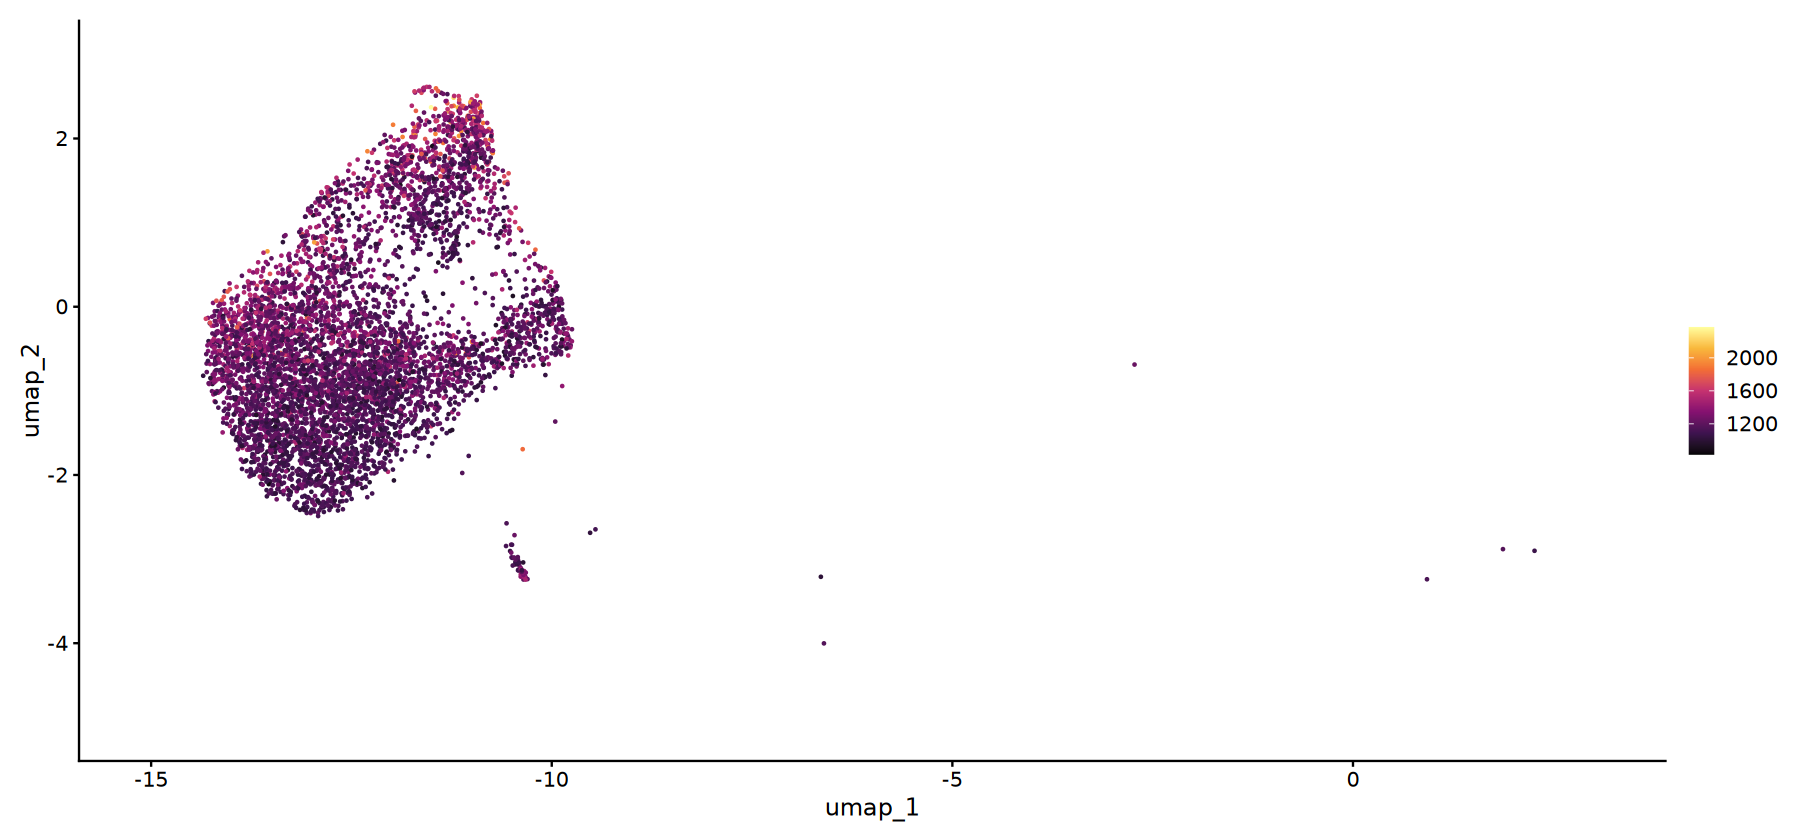

In [130]:
options(repr.plot.width = 15, repr.plot.height = 7) 

#Define color palette 
colorblind_vector <- hcl.colors(n=7, palette = "inferno", fixup = TRUE)

FeaturePlot(scRep_example,slot = 'counts', features =  'HALLMARK-ADIPOGENESIS') + 
  ggplot2::scale_color_gradientn(colors = colorblind_vector) + 
  ggplot2::theme(plot.title = ggplot2::element_blank())

In [136]:
scRep_example@assays$escape_ssGSEA$data <- as(scRep_example@assays$escape_ssGSEA$data, Class = 'matrix')

In [137]:
scRep_example@assays$escape_ssGSEA$data %>% head()

BRS02R1CACAGCCGGTTC BRS02R1TCTCCGGGCTCG
HALLMARK-ADIPOGENESIS        1468.1524           1730.8750          
HALLMARK-ALLOGRAFT-REJECTION  796.4452            809.2453          
                             BRS02R1GCCTTCTCTGAC BRS02R1GACTACGTTTTT
HALLMARK-ADIPOGENESIS        1728.6579           1421.7925          
HALLMARK-ALLOGRAFT-REJECTION  876.9832            692.8982          
                             BRS02R1TAGGCGAGGATT BRS02R1ATCAATCGTGTA
HALLMARK-ADIPOGENESIS        1788.952            1463.8435          
HALLMARK-ALLOGRAFT-REJECTION  704.100             641.5298          
                             BRS02R1CATTCTGCTGAT BRS02R1GTTCATCCTCAA
HALLMARK-ADIPOGENESIS        1505.5855           1728.268           
HALLMARK-ALLOGRAFT-REJECTION  809.2898            930.540           
                             BRS02R1GGCACGGGAGGG BRS02R1CACTTCTAGTCC ...
HALLMARK-ADIPOGENESIS        1598.0686           1549.1555           ...
HALLMARK-ALLOGRAFT-REJECTION  644.3212            818.9816           ...
                             BRD14R4TGGGTATACTGT BRD14R4TACCTATGTGGC
HALLMARK-ADIPOGENESIS        1176.4504           1030.657           
HALLMARK-ALLOGRAFT-REJECTION  647.7435            612.421           
                             BRD14R4CAACCCATGAGT BRD14R4CCTCCCGGACAC
HALLMARK-ADIPOGENESIS        1038.7890           972.3325           
HALLMARK-ALLOGRAFT-REJECTION  659.5269           672.6457           
                             BRD14R4TAATGCCCTCCT BRD14R4CGCGACCCGACT
HALLMARK-ADIPOGENESIS        1103.6138           1158.9040          
HALLMARK-ALLOGRAFT-REJECTION  626.9759            616.7011          
                             BRD14R4CCTATCAAATAC BRD14R4GTTCCGGATATC
HALLMARK-ADIPOGENESIS        1208.1448           1031.2351          
HALLMARK-ALLOGRAFT-REJECTION  849.7567            594.1568          
                             BRD14R4TATAACACGGAA BRD14R4GCCCGAACGTCT
HALLMARK-ADIPOGENESIS        1166.678            1199.4287          
HALLMARK-ALLOGRAFT-REJECTION  650.000             715.7593

In [138]:
scRep_example <- performNormalization(scRep_example, 
                                      assay = "escape_ssGSEA", 
                                      gene.sets = GS.hallmark[1:2])

[1] "Calculating features per cell..."
[1] "Normalizing enrichment scores per cell..."


In [139]:
# scRep_example <- performNormalization(scRep_example, 
#                                       assay = "escape.ssGSEA", 
#                                       gene.sets = GS.hallmark, 
#                                       scale.factor = scRep_example$nFeature_RNA)

In [142]:
rownames(scRep_example@assays$escape_ssGSEA$data)[1:2]

[1] "HALLMARK-ADIPOGENESIS"        "HALLMARK-ALLOGRAFT-REJECTION"

In [143]:
# I replaced @ with $ at the end because mine is Assay5:

In [147]:
Idents(scRep_example) %>% levels()

[1] "Endothelial cells"

In [148]:
Idents(scRep_example) <- 'treatment'

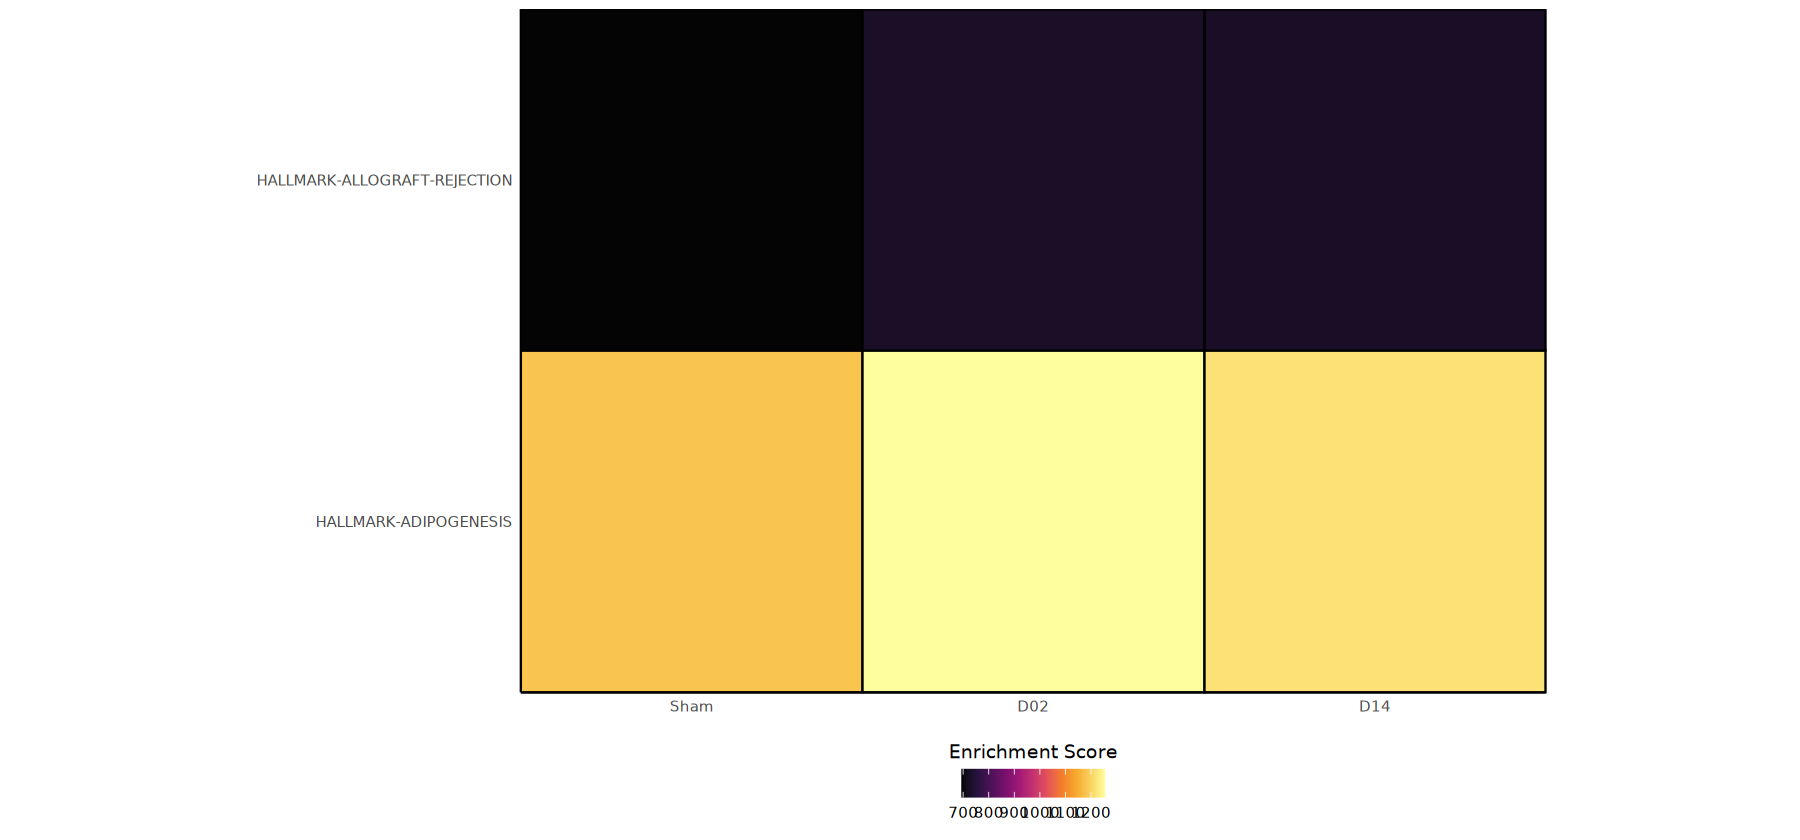

In [149]:
heatmapEnrichment(scRep_example, 
                  group.by = "ident",
                  gene.set.use = rownames(scRep_example@assays$escape_ssGSEA$data)[1:2],
                  assay = "escape_ssGSEA")

In [154]:
# available palettes:
hcl.pals()

[1] "Pastel 1"      "Dark 2"        "Dark 3"        "Set 2"        
  [5] "Set 3"         "Warm"          "Cold"          "Harmonic"     
  [9] "Dynamic"       "Grays"         "Light Grays"   "Blues 2"      
 [13] "Blues 3"       "Purples 2"     "Purples 3"     "Reds 2"       
 [17] "Reds 3"        "Greens 2"      "Greens 3"      "Oslo"         
 [21] "Purple-Blue"   "Red-Purple"    "Red-Blue"      "Purple-Orange"
 [25] "Purple-Yellow" "Blue-Yellow"   "Green-Yellow"  "Red-Yellow"   
 [29] "Heat"          "Heat 2"        "Terrain"       "Terrain 2"    
 [33] "Viridis"       "Plasma"        "Inferno"       "Rocket"       
 [37] "Mako"          "Dark Mint"     "Mint"          "BluGrn"       
 [41] "Teal"          "TealGrn"       "Emrld"         "BluYl"        
 [45] "ag_GrnYl"      "Peach"         "PinkYl"        "Burg"         
 [49] "BurgYl"        "RedOr"         "OrYel"         "Purp"         
 [53] "PurpOr"        "Sunset"        "Magenta"       "SunsetDark"   
 [57] "ag_Sunset"     "BrwnYl"        "YlOrRd"        "YlOrBr"       
 [61] "OrRd"          "Oranges"       "YlGn"          "YlGnBu"       
 [65] "Reds"          "RdPu"          "PuRd"          "Purples"      
 [69] "PuBuGn"        "PuBu"          "Greens"        "BuGn"         
 [73] "GnBu"          "BuPu"          "Blues"         "Lajolla"      
 [77] "Turku"         "Hawaii"        "Batlow"        "Blue-Red"     
 [81] "Blue-Red 2"    "Blue-Red 3"    "Red-Green"     "Purple-Green" 
 [85] "Purple-Brown"  "Green-Brown"   "Blue-Yellow 2" "Blue-Yellow 3"
 [89] "Green-Orange"  "Cyan-Magenta"  "Tropic"        "Broc"         
 [93] "Cork"          "Vik"           "Berlin"        "Lisbon"       
 [97] "Tofino"        "ArmyRose"      "Earth"         "Fall"         
[101] "Geyser"        "TealRose"      "Temps"         "PuOr"         
[105] "RdBu"          "RdGy"          "PiYG"          "PRGn"         
[109] "BrBG"          "RdYlBu"        "RdYlGn"        "Spectral"     
[113] "Zissou 1"      "Cividis"       "Roma"

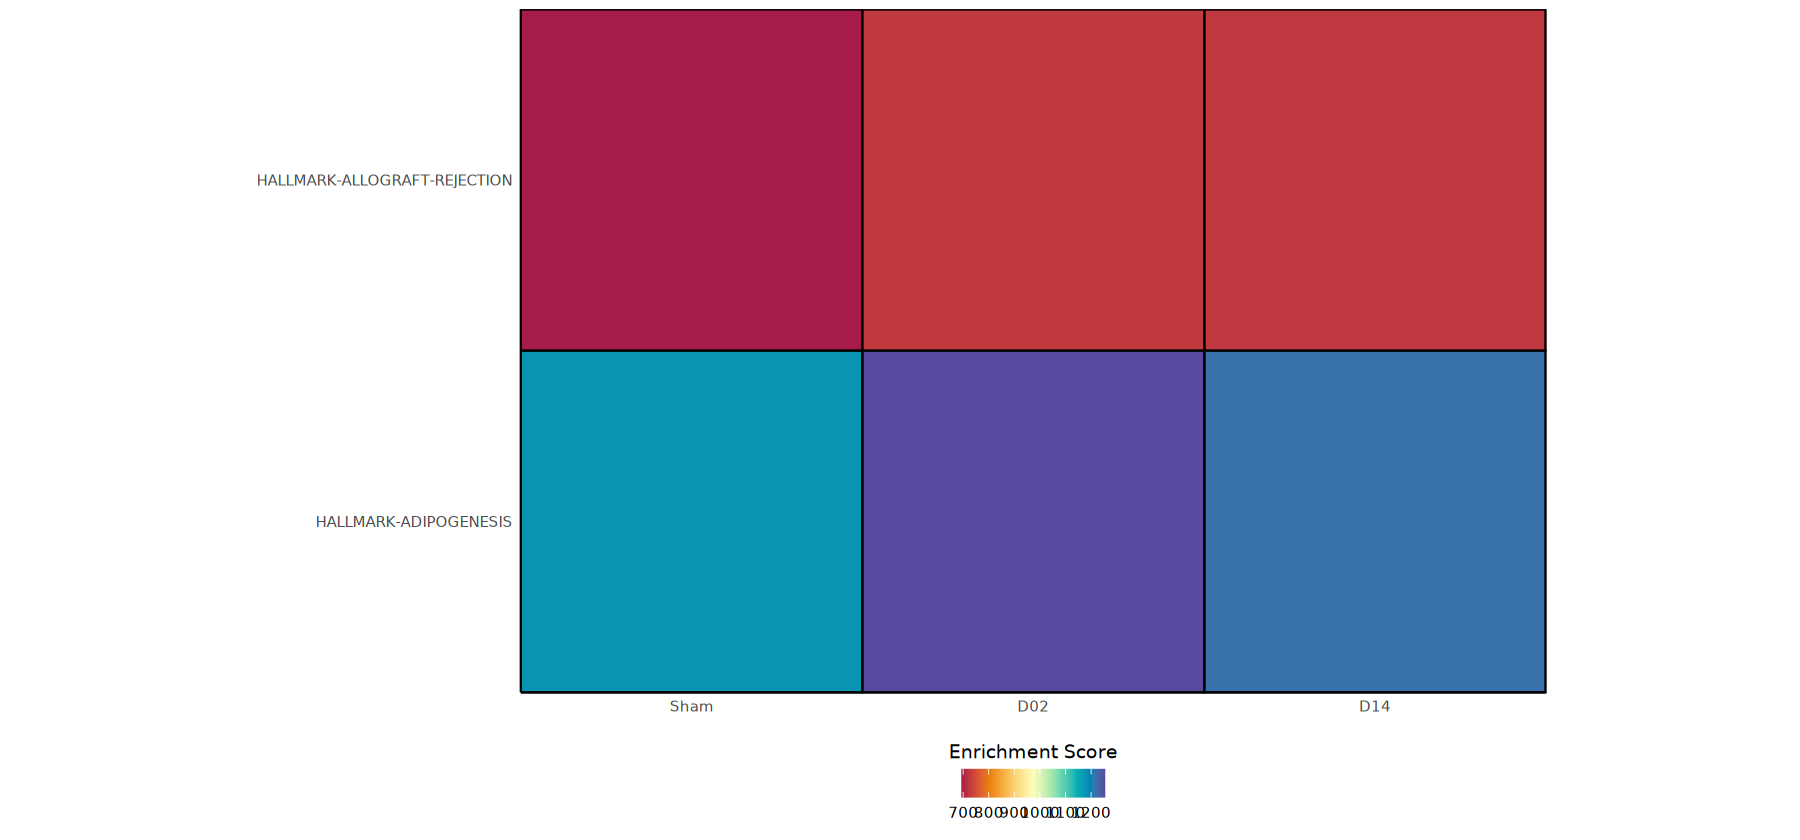

In [156]:
heatmapEnrichment(scRep_example, 
                  group.by = "ident",
                  gene.set.use = rownames(scRep_example@assays$escape_ssGSEA$data)[1:2],
                  assay = "escape_ssGSEA",
                  palette = "Spectral")

In [ ]:
RColorBrewer::brewer.pal

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


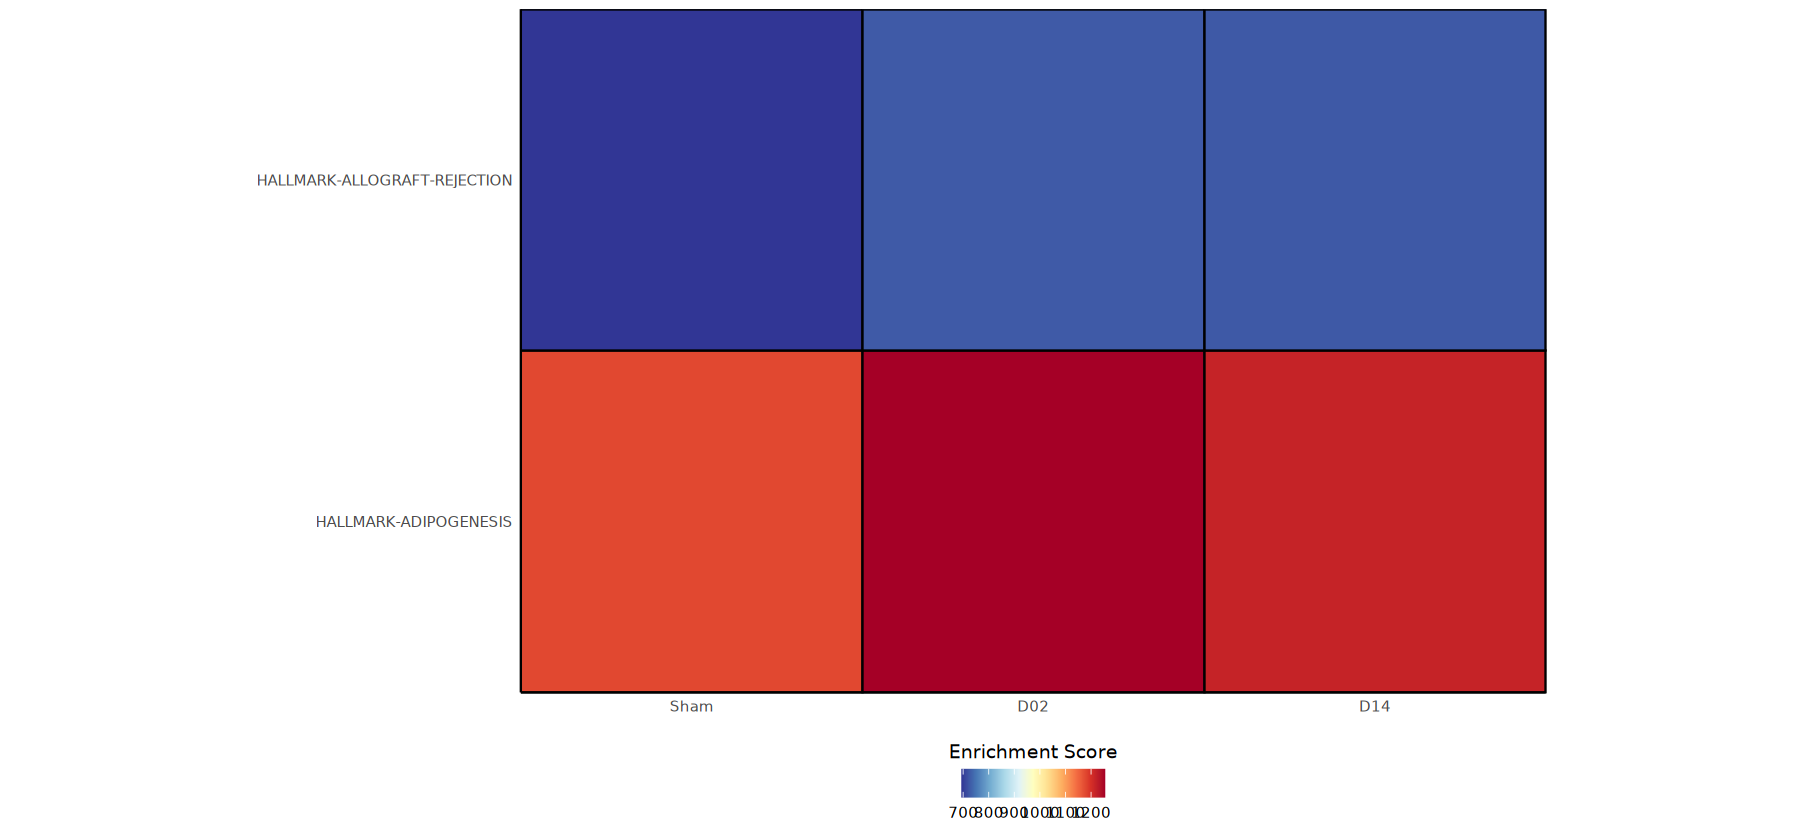

In [159]:
heatmapEnrichment(scRep_example, 
                  group.by = "ident",
                  gene.set.use = rownames(scRep_example@assays$escape_ssGSEA$data)[1:2],
                  assay = "escape_ssGSEA") + 
    ggplot2::scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(11, "RdYlBu"))) 

In [163]:
library(ggplot2)

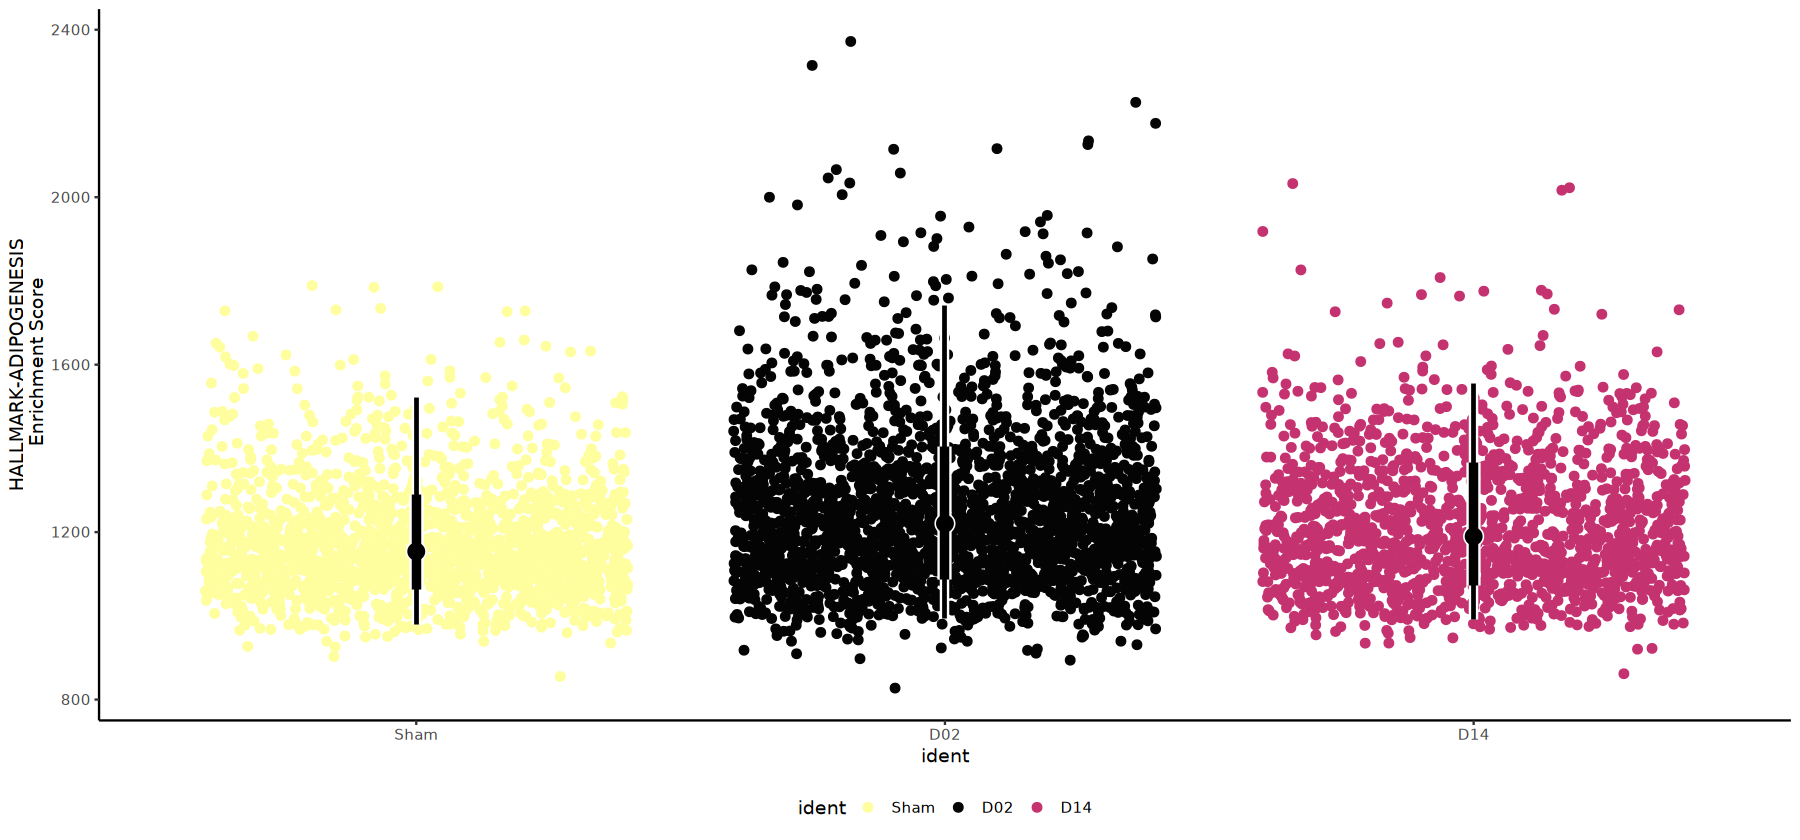

In [165]:
# geyserEnrichment:
# We can also focus on individual gene sets - one approach is to use geyserEnrichment(). Here individual cells are plotted along the Y-axis with graphical summary where the central dot refers to the median enrichment value and the thicker/thinner lines demonstrate the interval summaries referring to the 66% and 95%.

geyserEnrichment(scRep_example, 
                  group.by = "ident",
                  gene.set = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  assay = "escape_ssGSEA")

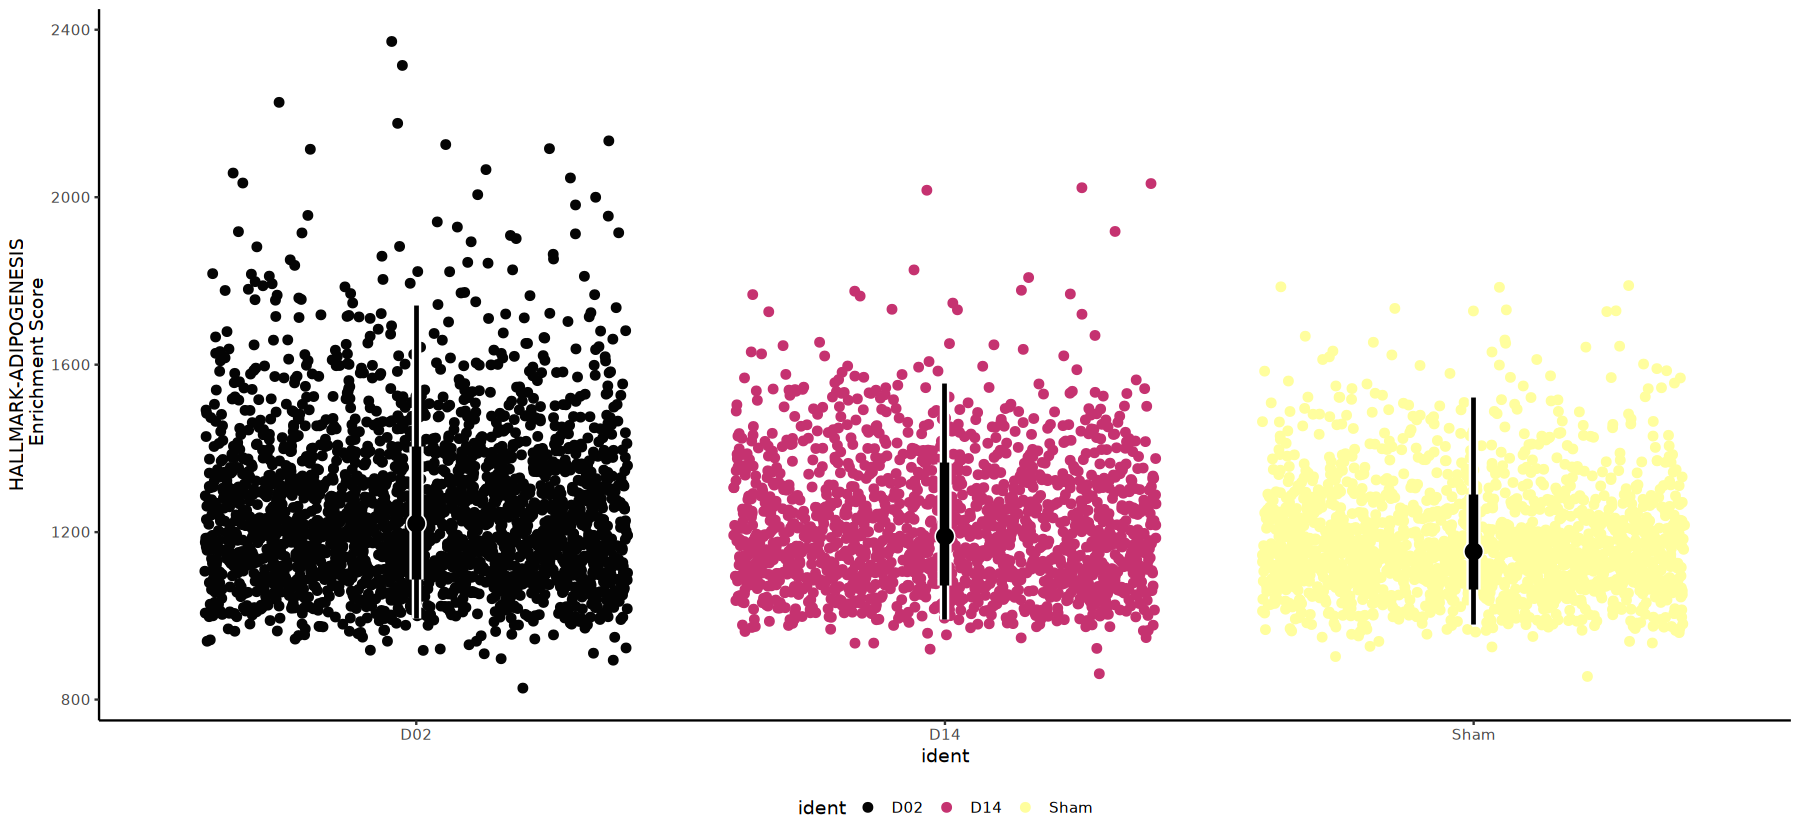

In [166]:
# order by mean:

geyserEnrichment(scRep_example, 
                  group.by = "ident",
                  gene.set = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  assay = "escape_ssGSEA",
                  order.by = "mean")

In [167]:
scRep_example$sub.celltype %>% table()

.
 EC1  EC2  EC3  EC4  EC5  EC6  EC7  EC8  EC9 
2306 1118  881  560  512  261  132   82   28 

In [168]:
scRep_example$treatment_subtypes <- paste(scRep_example$sub.celltype, scRep_example$treatment, sep = '_')

In [169]:
scRep_example$treatment_subtypes %>% 
                                table()

.
 EC1_D02  EC1_D14 EC1_Sham  EC2_D02  EC2_D14 EC2_Sham  EC3_D02  EC3_D14 
     616      657     1033     1017       47       54      249      447 
EC3_Sham  EC4_D02  EC4_D14 EC4_Sham  EC5_D02  EC5_D14 EC5_Sham  EC6_D02 
     185      194      103      263      194      232       86      126 
 EC6_D14 EC6_Sham  EC7_D02  EC7_D14 EC7_Sham  EC8_D02  EC8_D14 EC8_Sham 
      65       70       55       30       47       22       28       32 
 EC9_D02  EC9_D14 EC9_Sham 
      18        1        9 

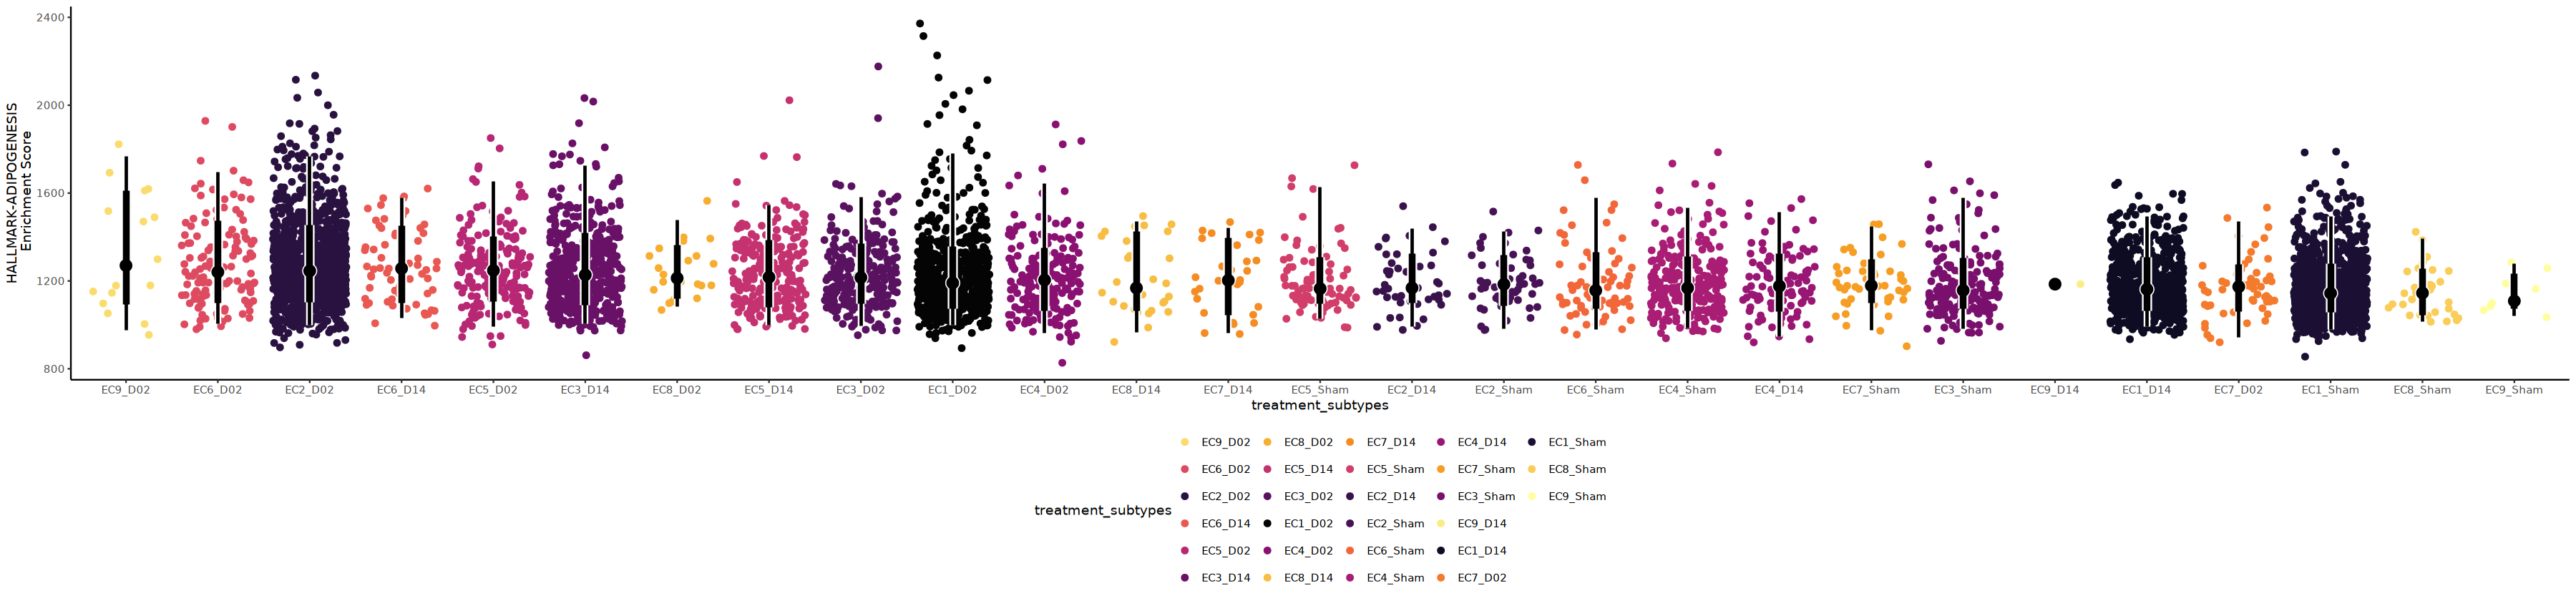

In [171]:
options(repr.plot.width = 30, repr.plot.height = 7) 

geyserEnrichment(scRep_example, 
                  group.by = "treatment_subtypes",
                  gene.set = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  assay = "escape_ssGSEA",
                  order.by = "mean")

In [172]:
my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)

my_margin <- ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 1), "cm"))  # Add margin to top, right, bottom, and left margins, respectively.


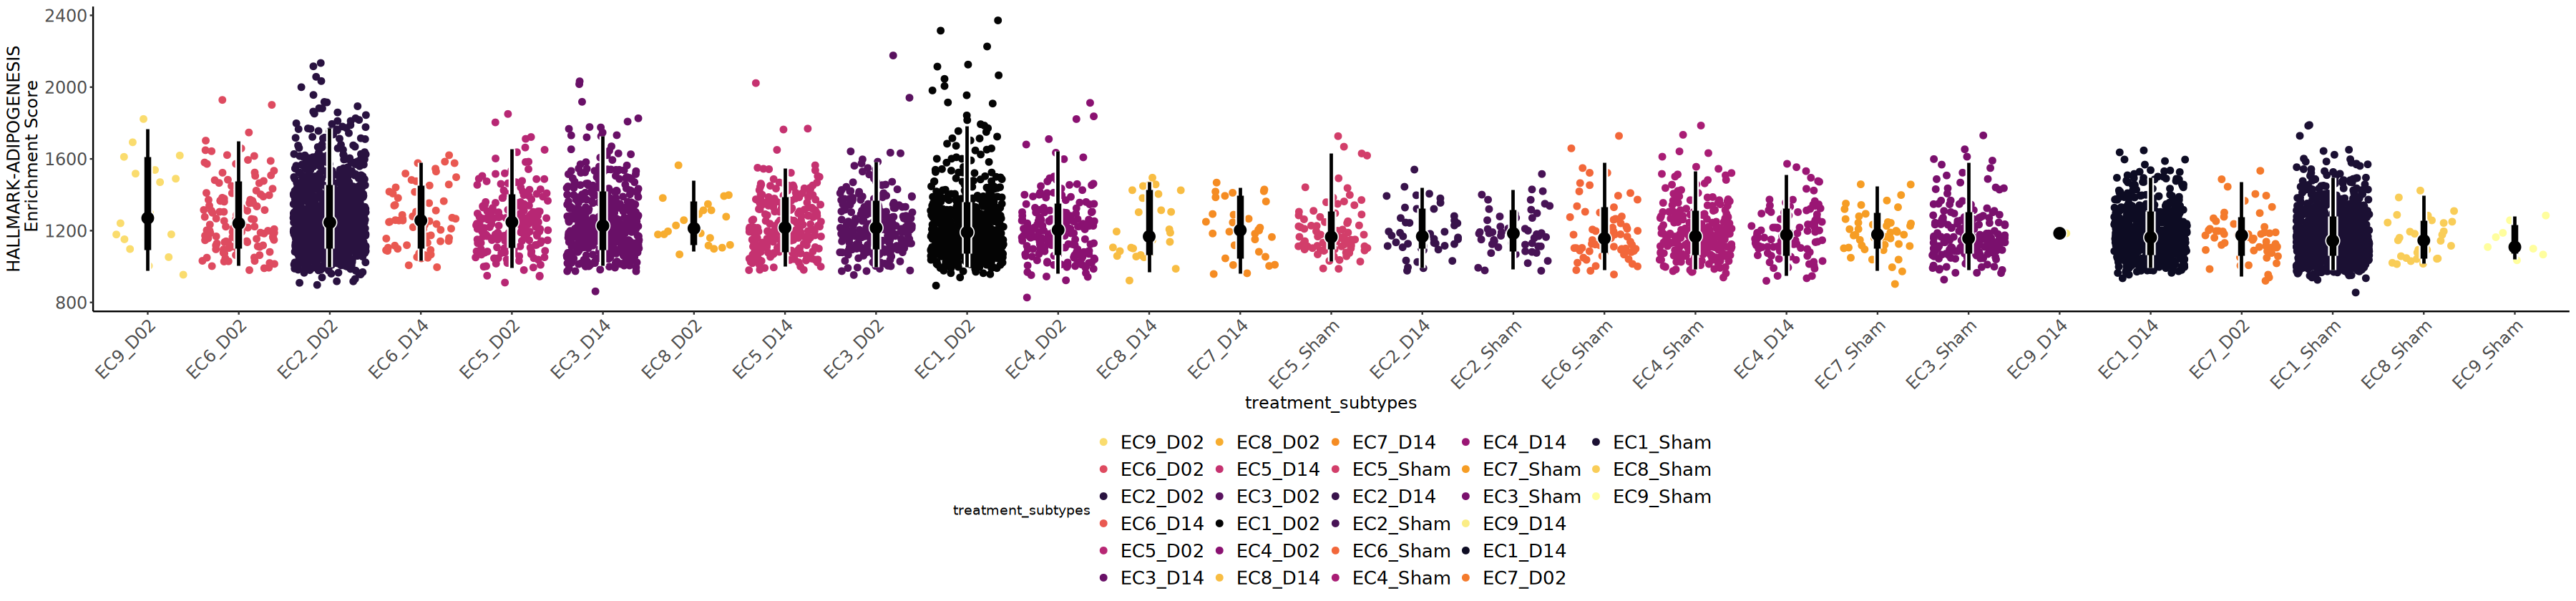

In [173]:
options(repr.plot.width = 30, repr.plot.height = 7) 

geyserEnrichment(scRep_example, 
                  group.by = "treatment_subtypes",
                  gene.set = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  assay = "escape_ssGSEA",
                  order.by = "mean") + my_theme

In [174]:
scRep_example$age %>% table()

.
 W10   W8 
 995 4885 

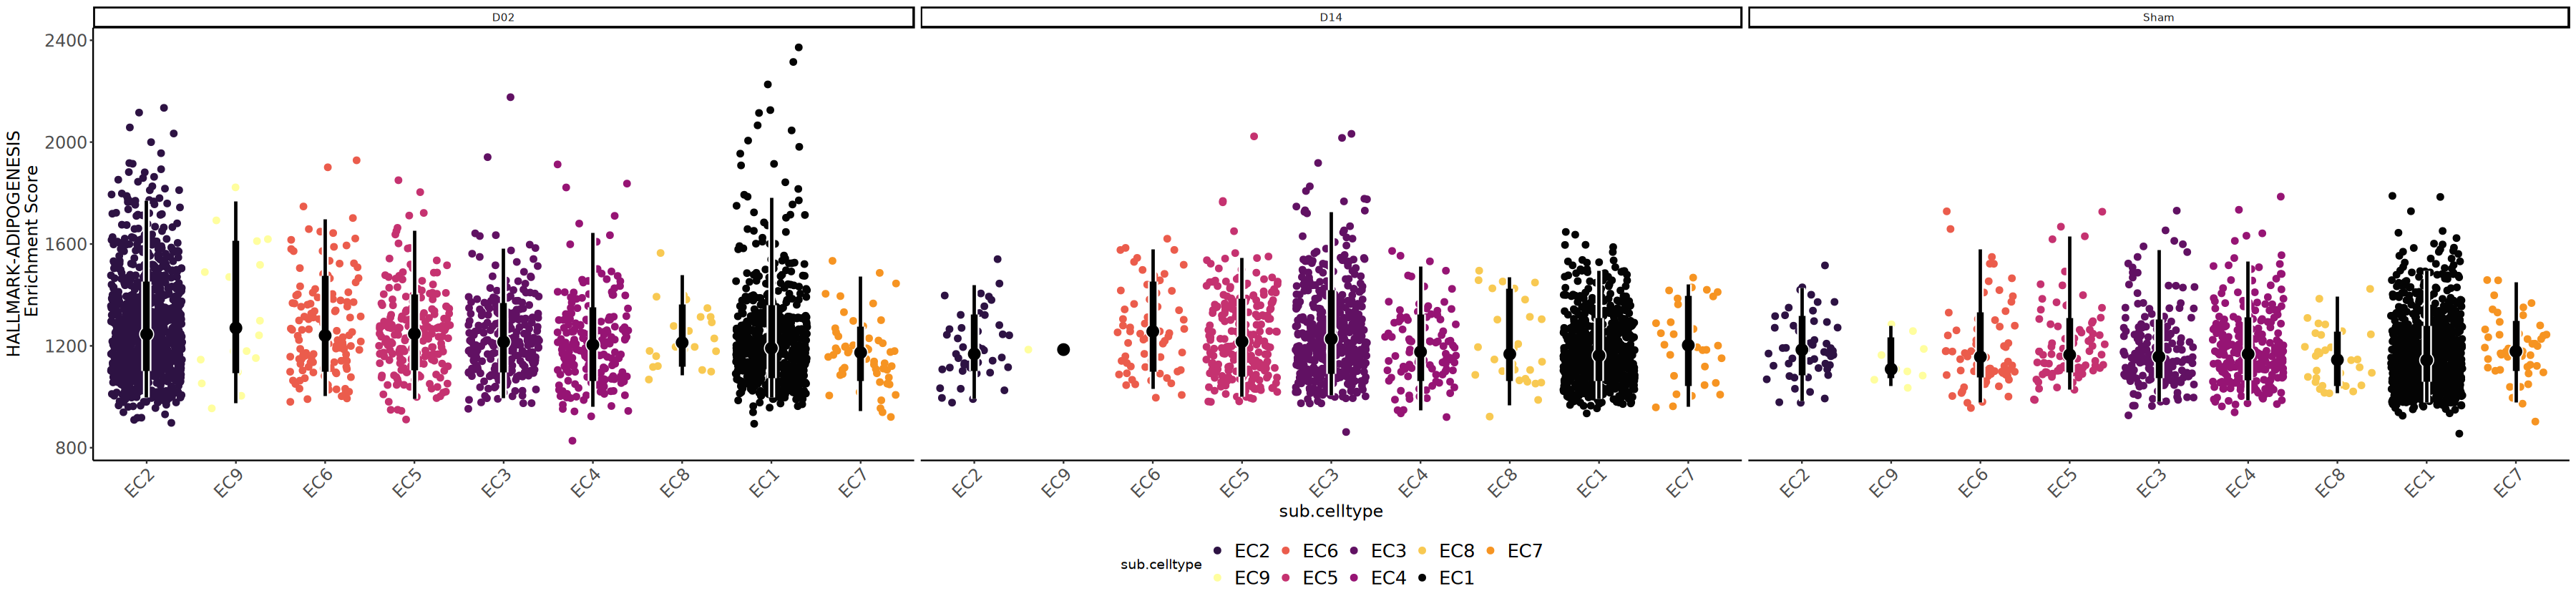

In [179]:
options(repr.plot.width = 30, repr.plot.height = 7) 

geyserEnrichment(scRep_example,  
                  group.by = "sub.celltype",
                  gene.set = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  assay = "escape_ssGSEA",
                  order.by = "mean",
                  facet.by = 'treatment') + my_theme

In [180]:
rownames(scRep_example@assays$escape_ssGSEA$data)[1]

[1] "HALLMARK-ADIPOGENESIS"

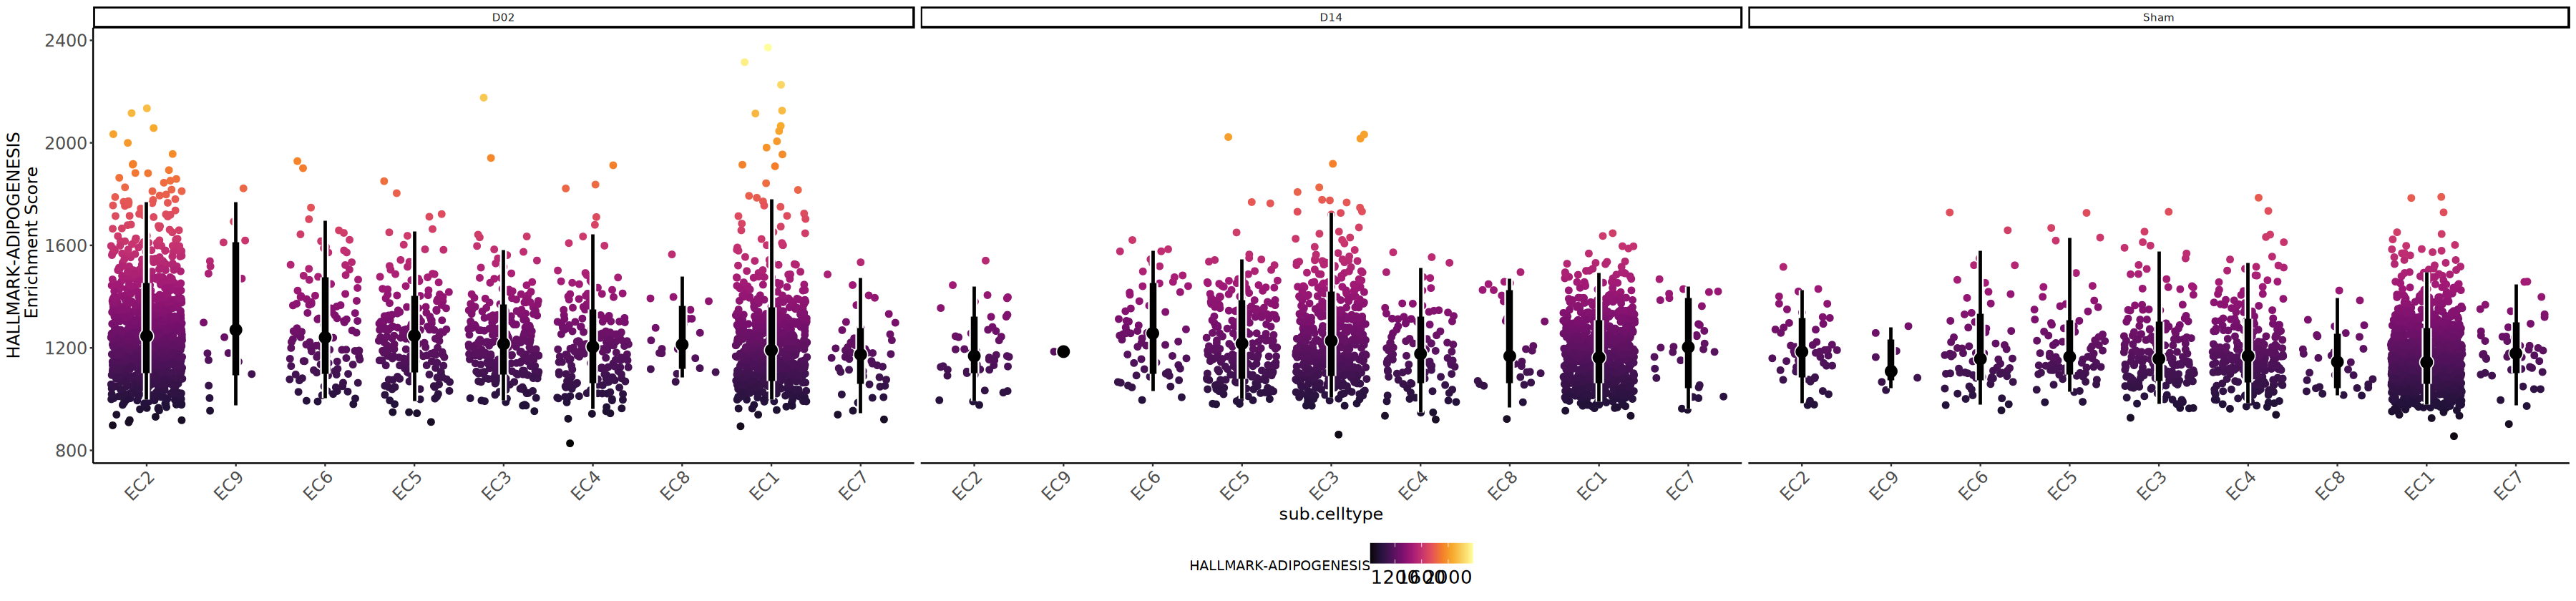

In [181]:
options(repr.plot.width = 30, repr.plot.height = 7) 

geyserEnrichment(scRep_example,  
                  group.by = "sub.celltype",
                  gene.set = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  assay = "escape_ssGSEA",
                  order.by = "mean",
                  facet.by = 'treatment',
                  color.by = 'HALLMARK-ADIPOGENESIS') + my_theme

Picking joint bandwidth of 31.3

Picking joint bandwidth of 44.9

Picking joint bandwidth of 43.4

Picking joint bandwidth of 44.5

Picking joint bandwidth of 44.7

Picking joint bandwidth of 60

Picking joint bandwidth of 49.1

Picking joint bandwidth of 60.4

Picking joint bandwidth of 88.5



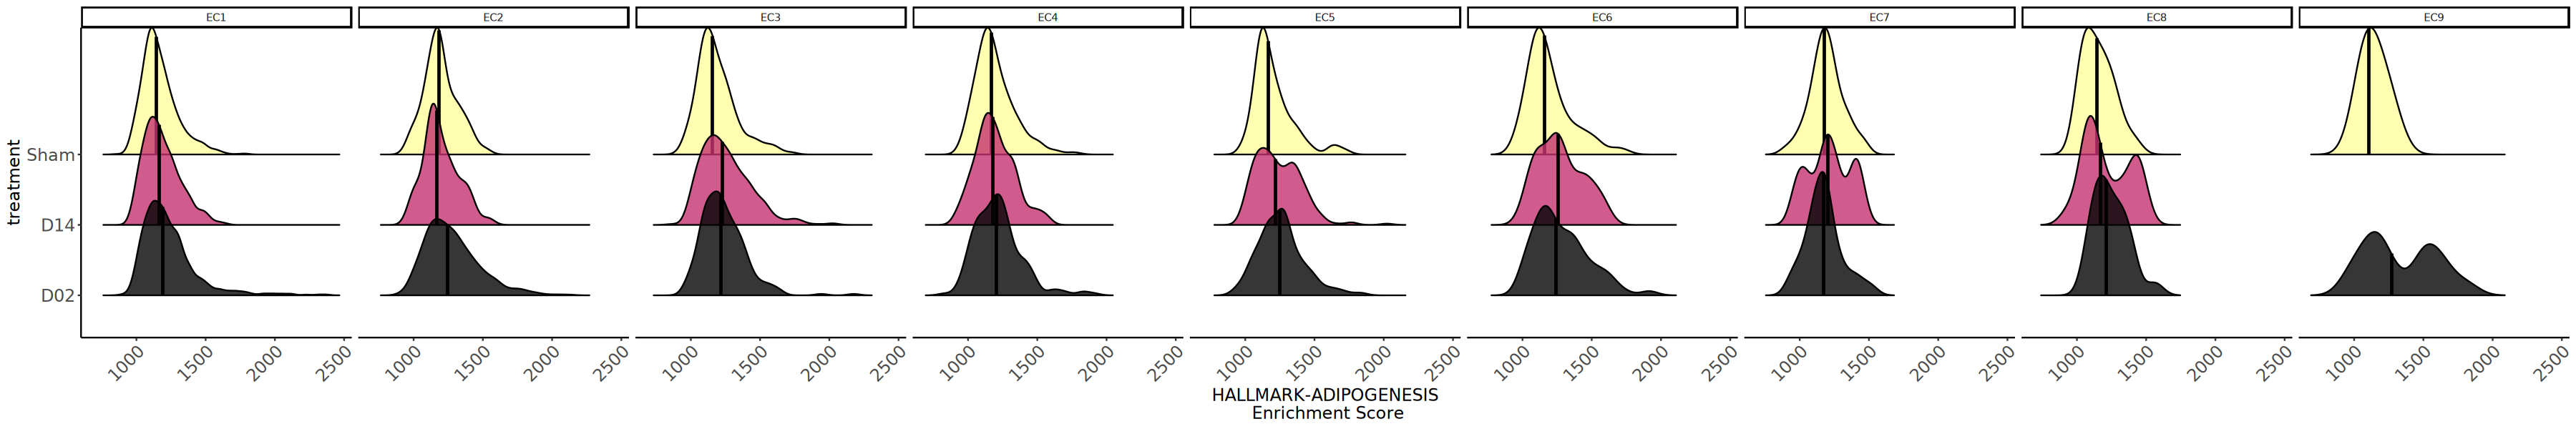

In [190]:
# ridgeEnrichment
# Similar to the geyserEnrichment() the ridgeEnrichment() can display the distribution of enrichment values across the selected gene set. The central line is at the median value for the respective grouping.

options(repr.plot.width = 30, repr.plot.height = 5) 

ridgeEnrichment(scRep_example,  
                  group.by = "treatment",
                  gene.set = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  assay = "escape_ssGSEA",
                  #order.by = "mean",
                  facet.by = 'sub.celltype',
                  # color.by = 'HALLMARK-ADIPOGENESIS'
                  ) + my_theme

Picking joint bandwidth of 0.185

Picking joint bandwidth of 0.265

Picking joint bandwidth of 0.256

Picking joint bandwidth of 0.263

Picking joint bandwidth of 0.264

Picking joint bandwidth of 0.354

Picking joint bandwidth of 0.29

Picking joint bandwidth of 0.357

Picking joint bandwidth of 0.523



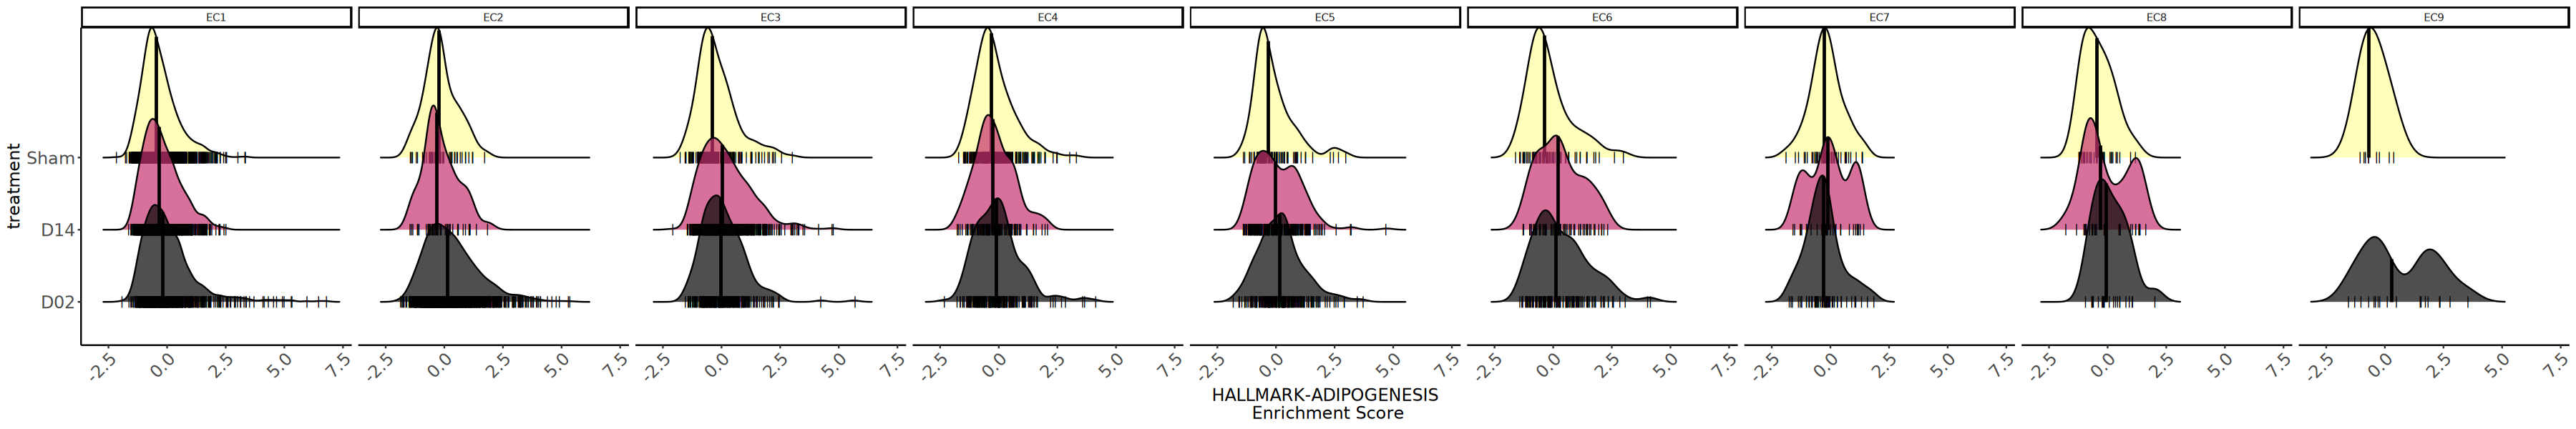

In [191]:
options(repr.plot.width = 30, repr.plot.height = 5) 

ridgeEnrichment(scRep_example,  
                  group.by = "treatment",
                  gene.set = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  assay = "escape_ssGSEA",
                  #order.by = "mean",
                  facet.by = 'sub.celltype',
                  # color.by = 'HALLMARK-ADIPOGENESIS',
                  add.rug = TRUE,
                  scale = TRUE
                  ) + my_theme

Notch went outside hinges
i Do you want `notch = FALSE`?


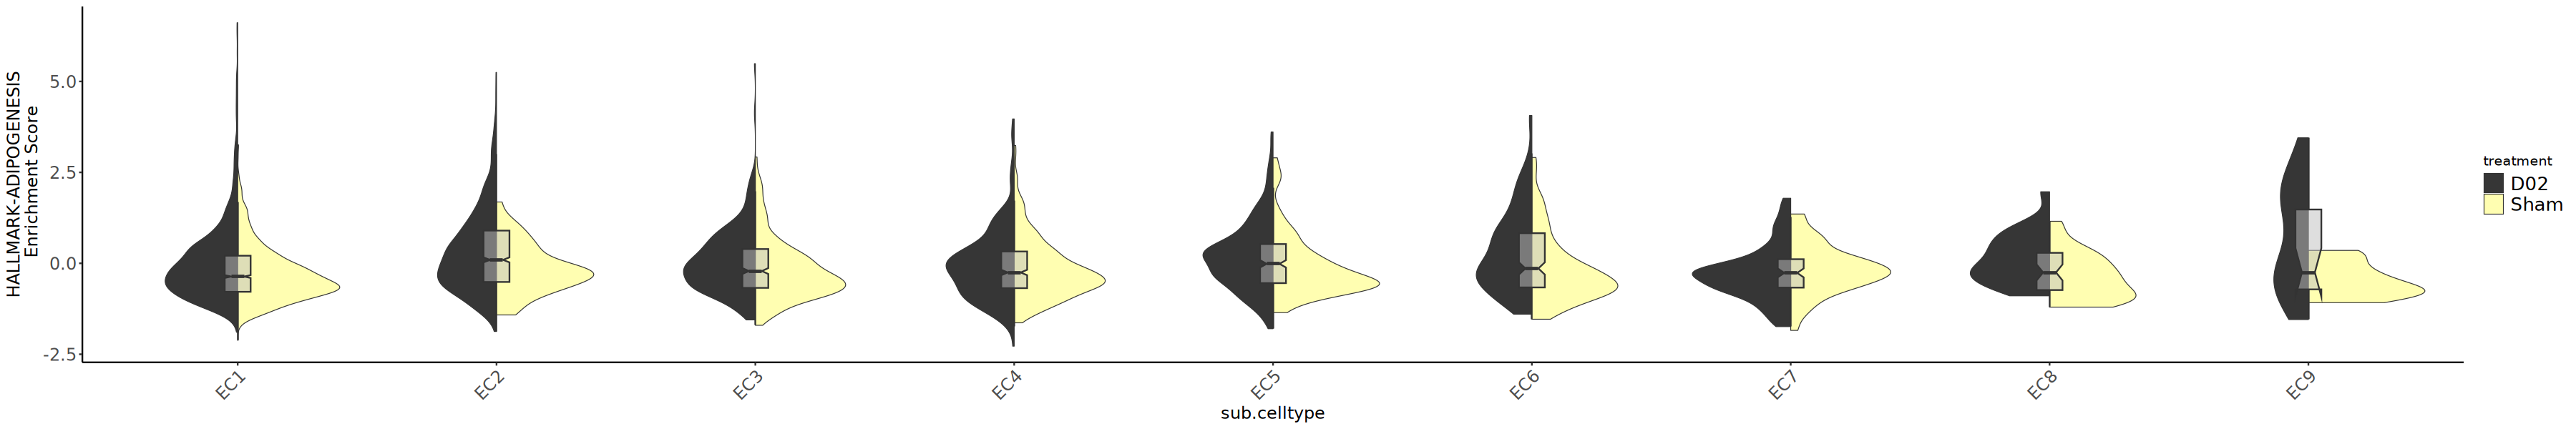

In [196]:
# For Binary classification based splitting:

splitEnrichment(subset(scRep_example, subset = treatment %in% c('D02', 'Sham')),  
                  group.by = "sub.celltype",
                  gene.set = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  assay = "escape_ssGSEA",, 
                  split.by = "treatment") + my_theme

Below can be useful to view the ranking of gene set of interest\
in each cell among all gene sets.

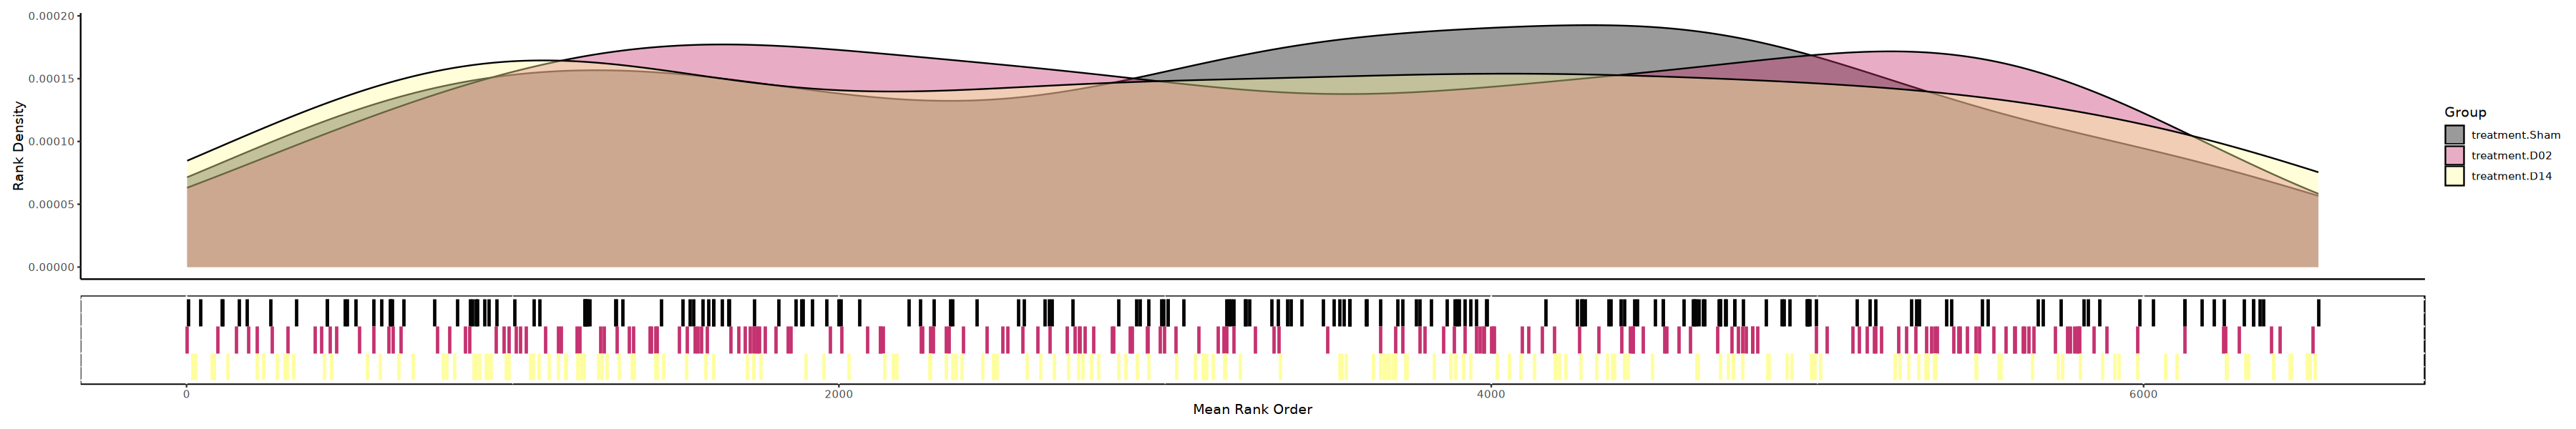

In [200]:
# densityEnrichment:

# densityEnrichment() is a method to visualize the mean rank position of the gene set features 
# along the total feature space by group. This is similar to traditional GSEA analysis, 
# but is not calculating the walk-based enrichment score. As this function calculates 
# mean ranks on the fly, it may take some time depending on the size of the single-cell object.

densityEnrichment(scRep_example, 
                  gene.set.use = rownames(scRep_example@assays$escape_ssGSEA$data)[1], 
                  group.by = "treatment",
                  gene.sets = GS.hallmark[1:2])

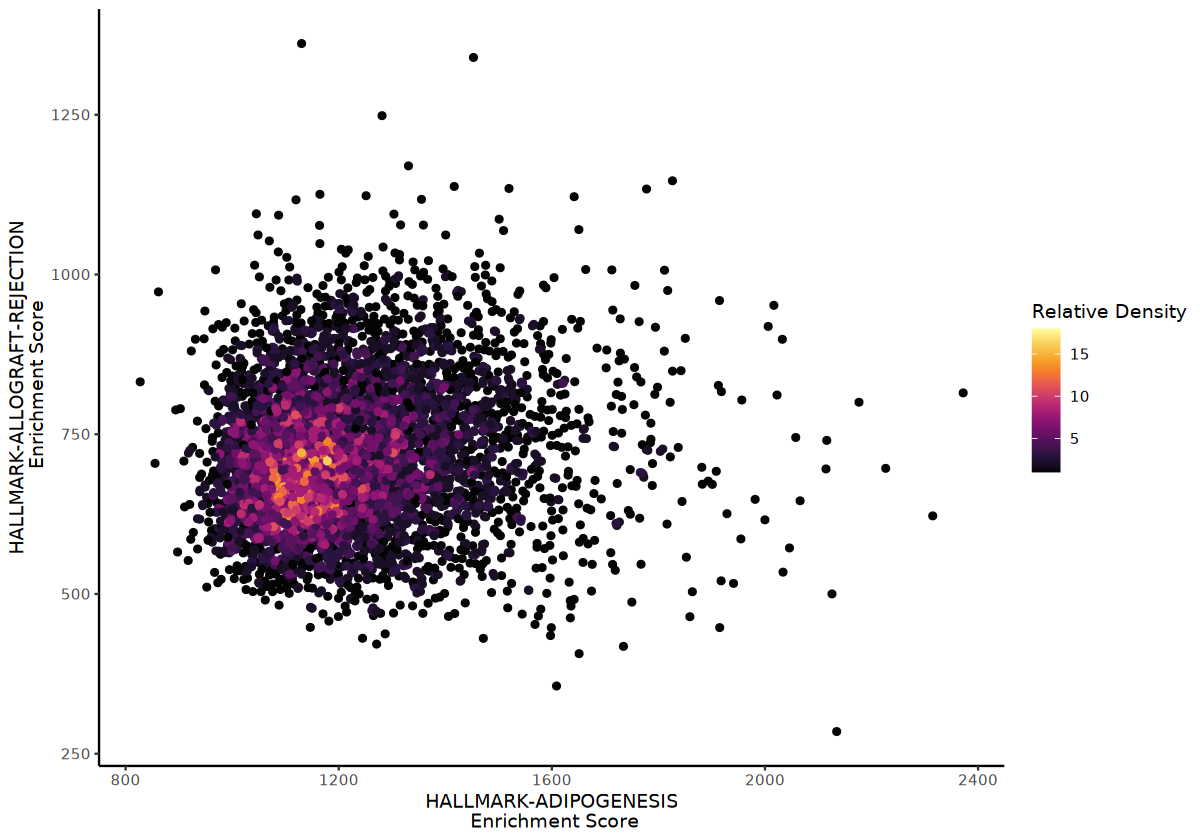

In [201]:
# scatterEnrichment:
# It may be advantageous to look at the distribution of multiple gene sets - here we can use scatterEnrichment() 
# for a 2 gene set comparison. The color values are based on the density of points determined 
# by the number of neighbors, similar to the Nebulosa R package. We just need to define which gene 
# set to plot on the x.axis and which to plot on the y.axis.

options(repr.plot.width = 10, repr.plot.height = 7) 

scatterEnrichment(scRep_example, 
                  assay = "escape_ssGSEA",
                  x.axis = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
                  y.axis = rownames(scRep_example@assays$escape_ssGSEA$data)[2])

In [204]:
# The scatter plot can also be converted into a hexbin, another method 
# for summarizing the individual cell distributions along the x and y axis, 
# by setting style = “hex”.

# scatterEnrichment(scRep_example, 
#                   assay = "escape_ssGSEA",
#                   x.axis = rownames(scRep_example@assays$escape_ssGSEA$data)[1],
#                   y.axis = rownames(scRep_example@assays$escape_ssGSEA$data)[1], 
#                   style = "hex")

# ERROR while rich displaying an object: Error in `stat_binhex()`:
# ! Problem while computing aesthetics.
# i Error occurred in the 1st layer.
# Caused by error in `FUN()`:
# ! `data` must be uniquely named but has duplicate columns

In [205]:
# Statistical Analysis:

# Principal Component Analysis (PCA)
# escape has its own PCA function performPCA() which will work on a single-cell object 
# or a matrix of enrichment values. This is specifically useful for downstream 
# visualizations as it stores the eigenvalues and rotations. If we want to 
# look at the relative contribution to overall variance of each component or 
# a Biplot-like overlay of the individual features, use performPCA().

# Alternatively, other PCA-based functions like Seurat’s RunPCA() or scater’s ``runPCA() 
# can be used. These functions are likely faster and would be ideal if we have a larger 
# number of cells and/or gene sets.

# scRep_example <- performPCA(scRep_example, 
#                             assay = "escape.ssGSEA",
#                             n.dim = 1:10)
# escape has a built in method for plotting PCA pcaEnrichment() that functions similarly 
# to the scatterEnrichment() function where x.axis and y.axis are the components to plot.

# pcaEnrichment(scRep_example, 
#               dimRed = "escape.PCA",
#               x.axis = "PC1",
#               y.axis = "PC2")


# pcaEnrichment() can plot additional information on the principal component analysis.

# add.percent.contribution will add the relative percent contribution of the x and y.axis 
# to total variability observed in the PCA.

# display.factors will overlay the magnitude and direction that the features\gene sets 
# contribute to the selected components. The number of gene sets is determined by number.of.factors. 
# This can assist in understanding the underlying differences in enrichment across different cells.

# pcaEnrichment(scRep_example, 
#               dimRed = "escape.PCA",
#               x.axis = "PC1",
#               y.axis = "PC2",
#               add.percent.contribution = TRUE,
#               display.factors = TRUE,
#               number.of.factors = 10)


# Differential Enrichment
# Differential enrichment analysis can be performed similar to differential gene 
# expression analysis. For the purposes of finding the differential enrichment 
# values, we can first normalize the enrichment values for the ssGSEA calculations. 
# Here we are using the scale.factor parameter of nFeature_RNA, which is the total 
# feature space for each cell.

# scRep_example <- performNormalization(scRep_example, 
#                                       assay = "escape.ssGSEA", 
#                                       gene.sets = GS.hallmark, 
#                                       scale.factor = scRep_example$nFeature_RNA)
# ## [1] "Normalizing enrichment scores per cell..."
# all.markers <- FindAllMarkers(scRep_example, 
#                               assay = "escape.ssGSEA_normalized", 
#                               min.pct = 0,
#                               logfc.threshold = 0)

# head(all.markers)